In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from math import sqrt
sns.set_style('darkgrid')
plt.style.use("bmh")
%matplotlib inline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [2]:
fintech_list=['COIN', 'PYPL', 'HOOD', 'SOFI', 'FI']


In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [4]:
for stock in fintech_list:
    globals()[stock]=yf.download(stock, start, end)
company_list=[COIN, PYPL, HOOD, SOFI, FI]
company_name=['COINBASE', 'PAYPAL', 'ROBINHOOD', 'SOFI', 'FISERV']
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()
for company, com_name in zip(company_list, company_name):
    company['company_name']=com_name
all_fintech_df=pd.concat(company_list, axis=0)
all_fintech_df.tail(5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-20  120.760002  121.260002  119.570000  119.690002  119.690002   
2023-09-21  119.040001  119.129997  116.660004  116.720001  116.720001   
2023-09-22  116.739998  116.949997  115.639999  116.080002  116.080002   
2023-09-25  115.639999  116.379997  115.459999  116.089996  116.089996   
2023-09-26  115.279999  115.959999  114.500000  114.559998  114.559998   

             Volume  Daily Return company_name  
Date                                            
2023-09-20  1444400     -0.008286       FISERV  
2023-09-21  3260400     -0.024814       FISERV  
2023-09-22  2238600     -0.005483       FISERV  
2023-09-25  1513200      0.000086       FISERV  
2023-09-26  2147800     -0.013179       FISERV

In [5]:
for name, stock in zip(company_name, company_list ):
    display(name)
    display(stock.info())

'COINBASE'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   Daily Return  502 non-null    float64
 7   company_name  503 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 35.4+ KB


None

'PAYPAL'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   Daily Return  502 non-null    float64
 7   company_name  503 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 35.4+ KB


None

'ROBINHOOD'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   Daily Return  502 non-null    float64
 7   company_name  503 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 35.4+ KB


None

'SOFI'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   Daily Return  502 non-null    float64
 7   company_name  503 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 35.4+ KB


None

'FISERV'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   Daily Return  502 non-null    float64
 7   company_name  503 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 35.4+ KB


None

In [6]:
all_fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2021-09-27 to 2023-09-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Adj Close     2515 non-null   float64
 5   Volume        2515 non-null   int64  
 6   Daily Return  2510 non-null   float64
 7   company_name  2515 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 176.8+ KB


In [7]:
for name, stock in zip(company_name, company_list):
    display(name)
    display(stock.describe())

'COINBASE'

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   115.039543  119.076660  111.096143  114.962167  114.962167   
std     84.042924   85.776400   82.059377   83.908684   83.908684   
min     32.580002   33.480000   31.549999   32.529999   32.529999   
25%     59.969999   62.090000   56.809999   59.400000   59.400000   
50%     71.879997   74.970001   69.279999   72.470001   72.470001   
75%    171.614998  176.625000  162.180000  171.364998  171.364998   
max    367.390015  368.899994  345.559998  357.390015  357.390015   

             Volume  Daily Return  
count  5.030000e+02    502.000000  
mean   1.208065e+07     -0.000434  
std    9.120657e+06      0.062440  
min    2.311900e+06     -0.264009  
25%    5.756800e+06     -0.037844  
50%    1.015370e+07     -0.004577  
75%    1.538360e+07      0.036129  
max    6.708020e+07      0.244910

'PAYPAL'

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   104.047032  105.720656  102.027765  103.738897  103.738897   
std     53.267059   53.776635   52.080915   52.711561   52.711561   
min     57.389999   58.900002   57.290001   57.880001   57.880001   
25%     73.127502   74.300003   71.889999   73.239998   73.239998   
50%     80.870003   82.919998   79.580002   81.050003   81.050003   
75%    105.345001  106.985500  102.174999  105.094997  105.094997   
max    274.779999  276.779999  272.186005  273.390015  273.390015   

             Volume  Daily Return  
count  5.030000e+02    502.000000  
mean   1.602903e+07     -0.002554  
std    9.412311e+06      0.031197  
min    3.985900e+06     -0.245904  
25%    1.118455e+07     -0.018510  
50%    1.404900e+07     -0.002677  
75%    1.830800e+07      0.012870  
max    1.362640e+08      0.121755

'ROBINHOOD'

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean    13.243777   13.589312   12.862443   13.218529   13.218529   
std      8.245500    8.354520    8.030837    8.155460    8.155460   
min      6.840000    7.140000    6.810000    6.890000    6.890000   
25%      9.335000    9.580000    9.085000    9.345000    9.345000   
50%     10.260000   10.550000    9.930000   10.250000   10.250000   
75%     12.460000   12.780000   11.970000   12.430000   12.430000   
max     44.930000   45.959999   43.950001   44.759998   44.759998   

             Volume  Daily Return  
count  5.030000e+02    502.000000  
mean   1.272755e+07     -0.002184  
std    1.007778e+07      0.042546  
min    1.823800e+06     -0.190357  
25%    6.218400e+06     -0.027368  
50%    9.593300e+06     -0.002994  
75%    1.562245e+07      0.021059  
max    1.015136e+08      0.248832

'SOFI'

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean     8.780356    9.040408    8.491684    8.748479    8.748479   
std      4.494220    4.615400    4.328013    4.451001    4.451001   
min      4.300000    4.370000    4.240000    4.300000    4.300000   
25%      5.730000    5.880000    5.575000    5.725000    5.725000   
50%      7.070000    7.280000    6.835000    7.010000    7.010000   
75%      9.652500   10.010000    9.302500    9.570000    9.570000   
max     23.990000   24.650000   22.830000   23.290001   23.290001   

             Volume  Daily Return  
count  5.030000e+02    502.000000  
mean   4.355054e+07     -0.000641  
std    2.818711e+07      0.047388  
min    1.105440e+07     -0.121990  
25%    2.667565e+07     -0.029903  
50%    3.568380e+07     -0.004072  
75%    5.097920e+07      0.027403  
max    2.689360e+08      0.283931

'FISERV'

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   106.634632  107.827873  105.509702  106.716004  106.716004   
std      9.798427    9.648652    9.962490    9.803287    9.803287   
min     88.339996   89.699997   87.029999   88.379997   88.379997   
25%     99.635002  100.709999   98.290001   99.540001   99.540001   
50%    104.230003  105.290001  102.900002  104.269997  104.269997   
75%    114.720001  115.975002  113.790001  114.634998  114.634998   
max    129.740005  130.740005  128.910004  130.059998  130.059998   

             Volume  Daily Return  
count  5.030000e+02    502.000000  
mean   3.588302e+06      0.000254  
std    2.217293e+06      0.017754  
min    1.338400e+06     -0.100237  
25%    2.437300e+06     -0.009226  
50%    3.166400e+06      0.000223  
75%    4.036650e+06      0.009392  
max    3.173540e+07      0.083459

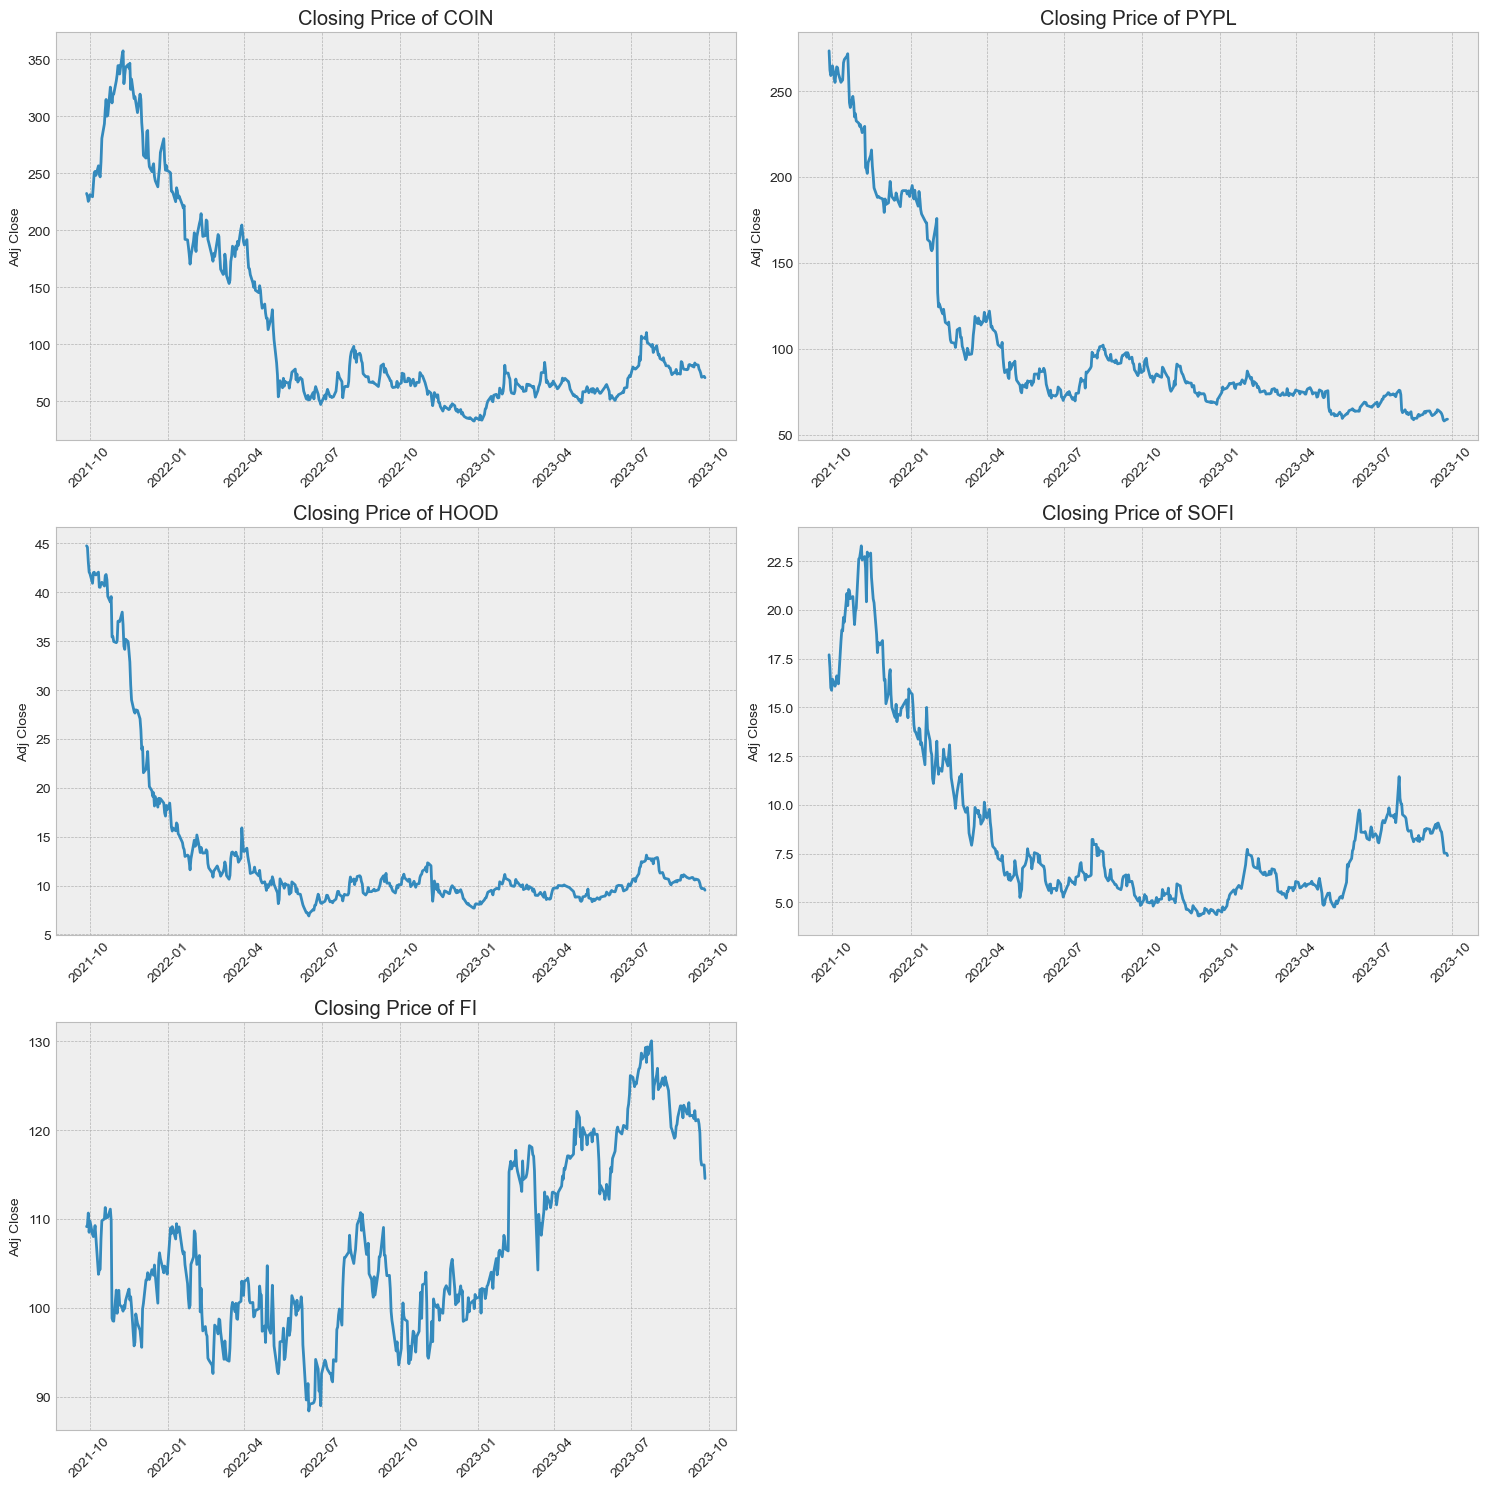

In [8]:
#Plotting the Closing price
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company, x=company.index, y='Adj Close')
    plt.ylabel('Adj Close')
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.title(f"Closing Price of {fintech_list[i - 1]}")
    
plt.tight_layout()

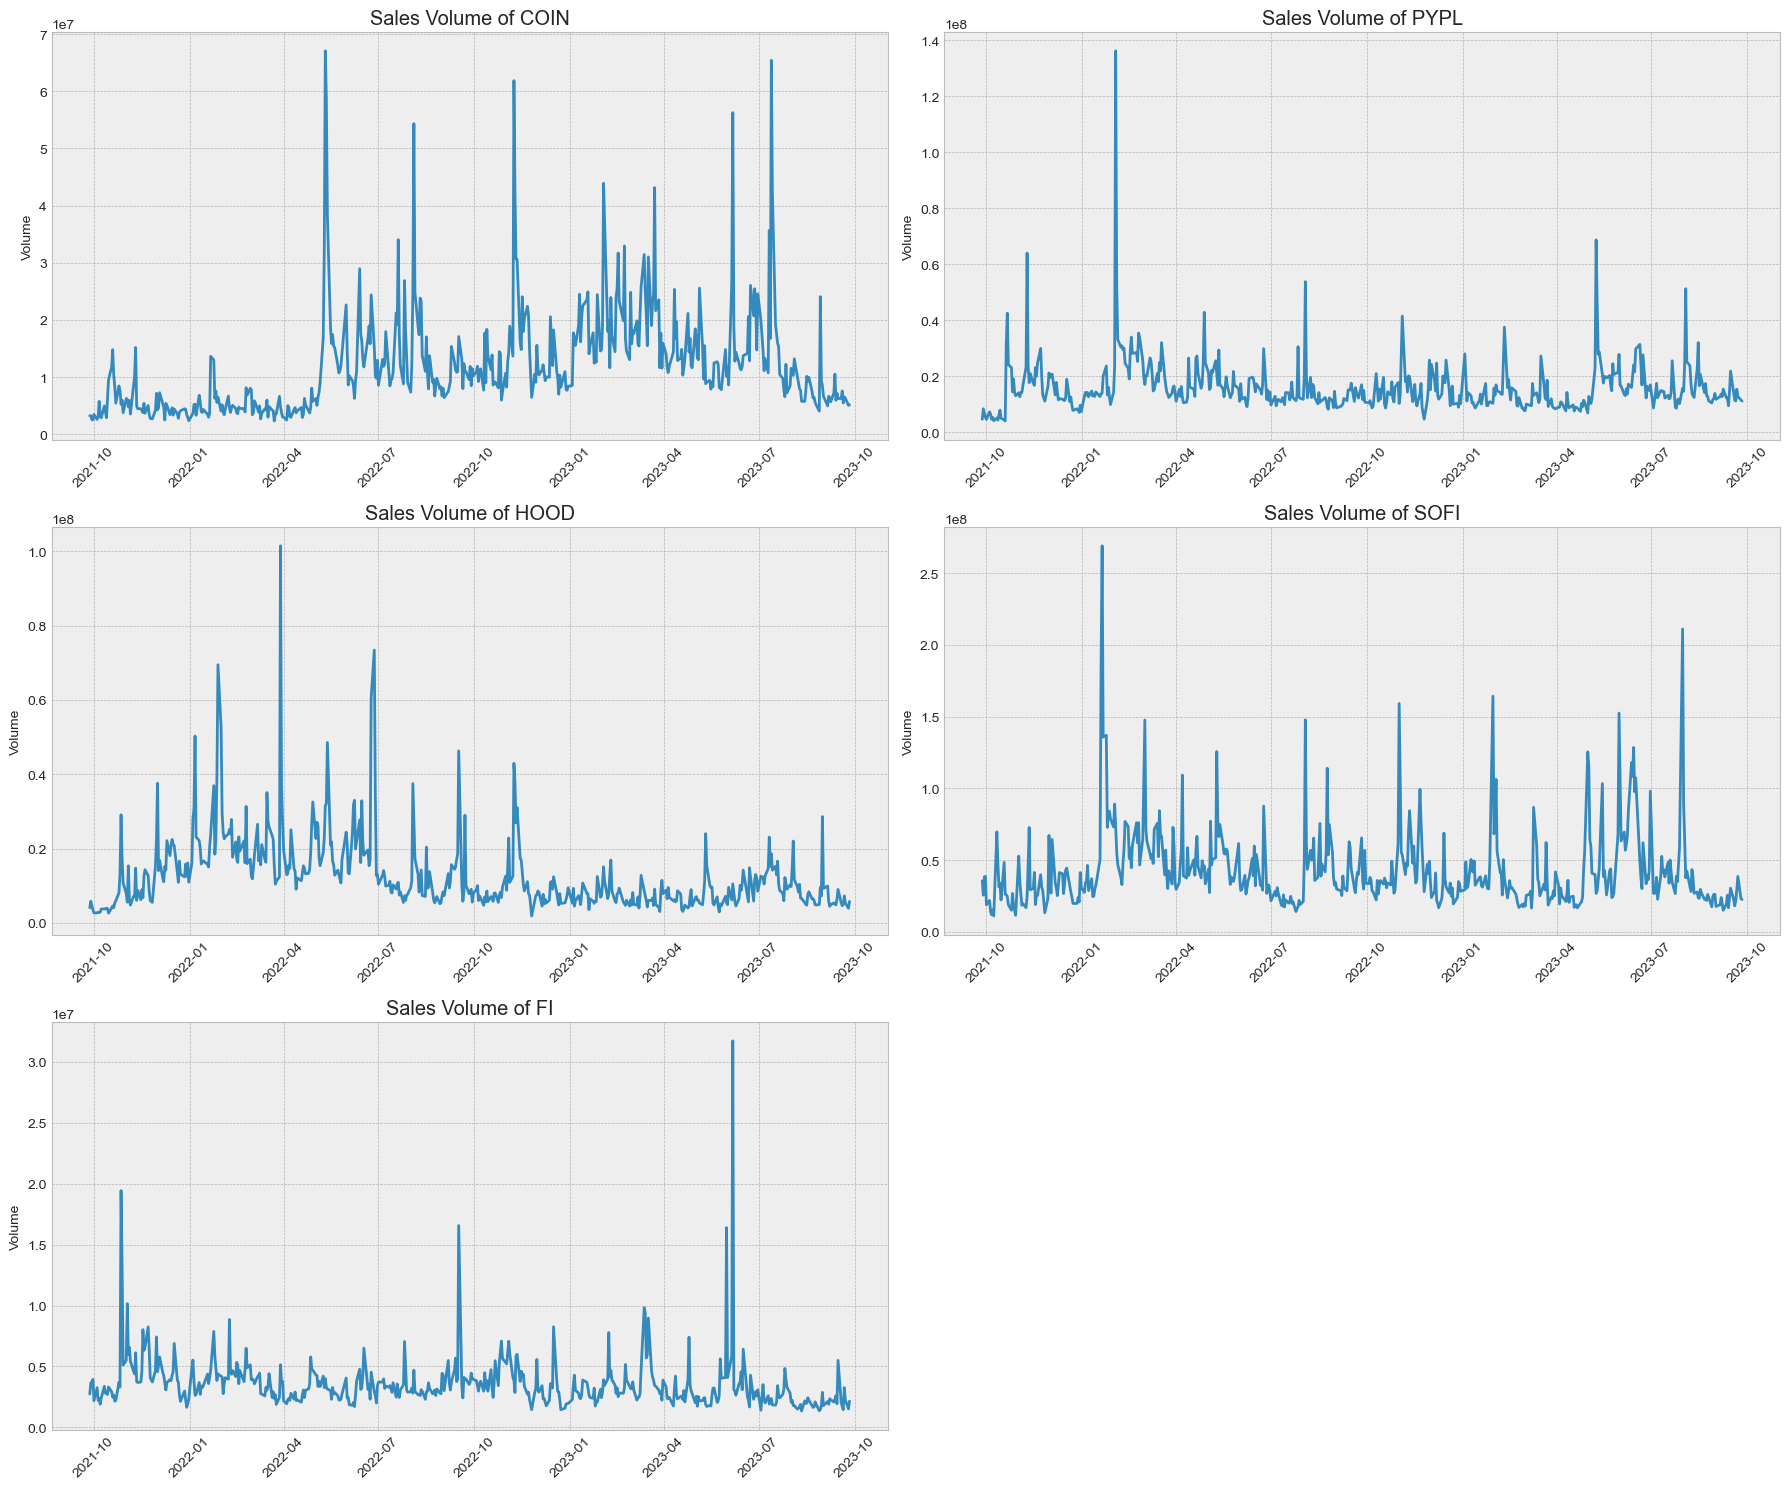

In [9]:
#Plotting the sales volume of each stock
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company, x=company.index, y='Volume')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.title(f"Sales Volume of {fintech_list[i - 1]}")
    
plt.tight_layout()

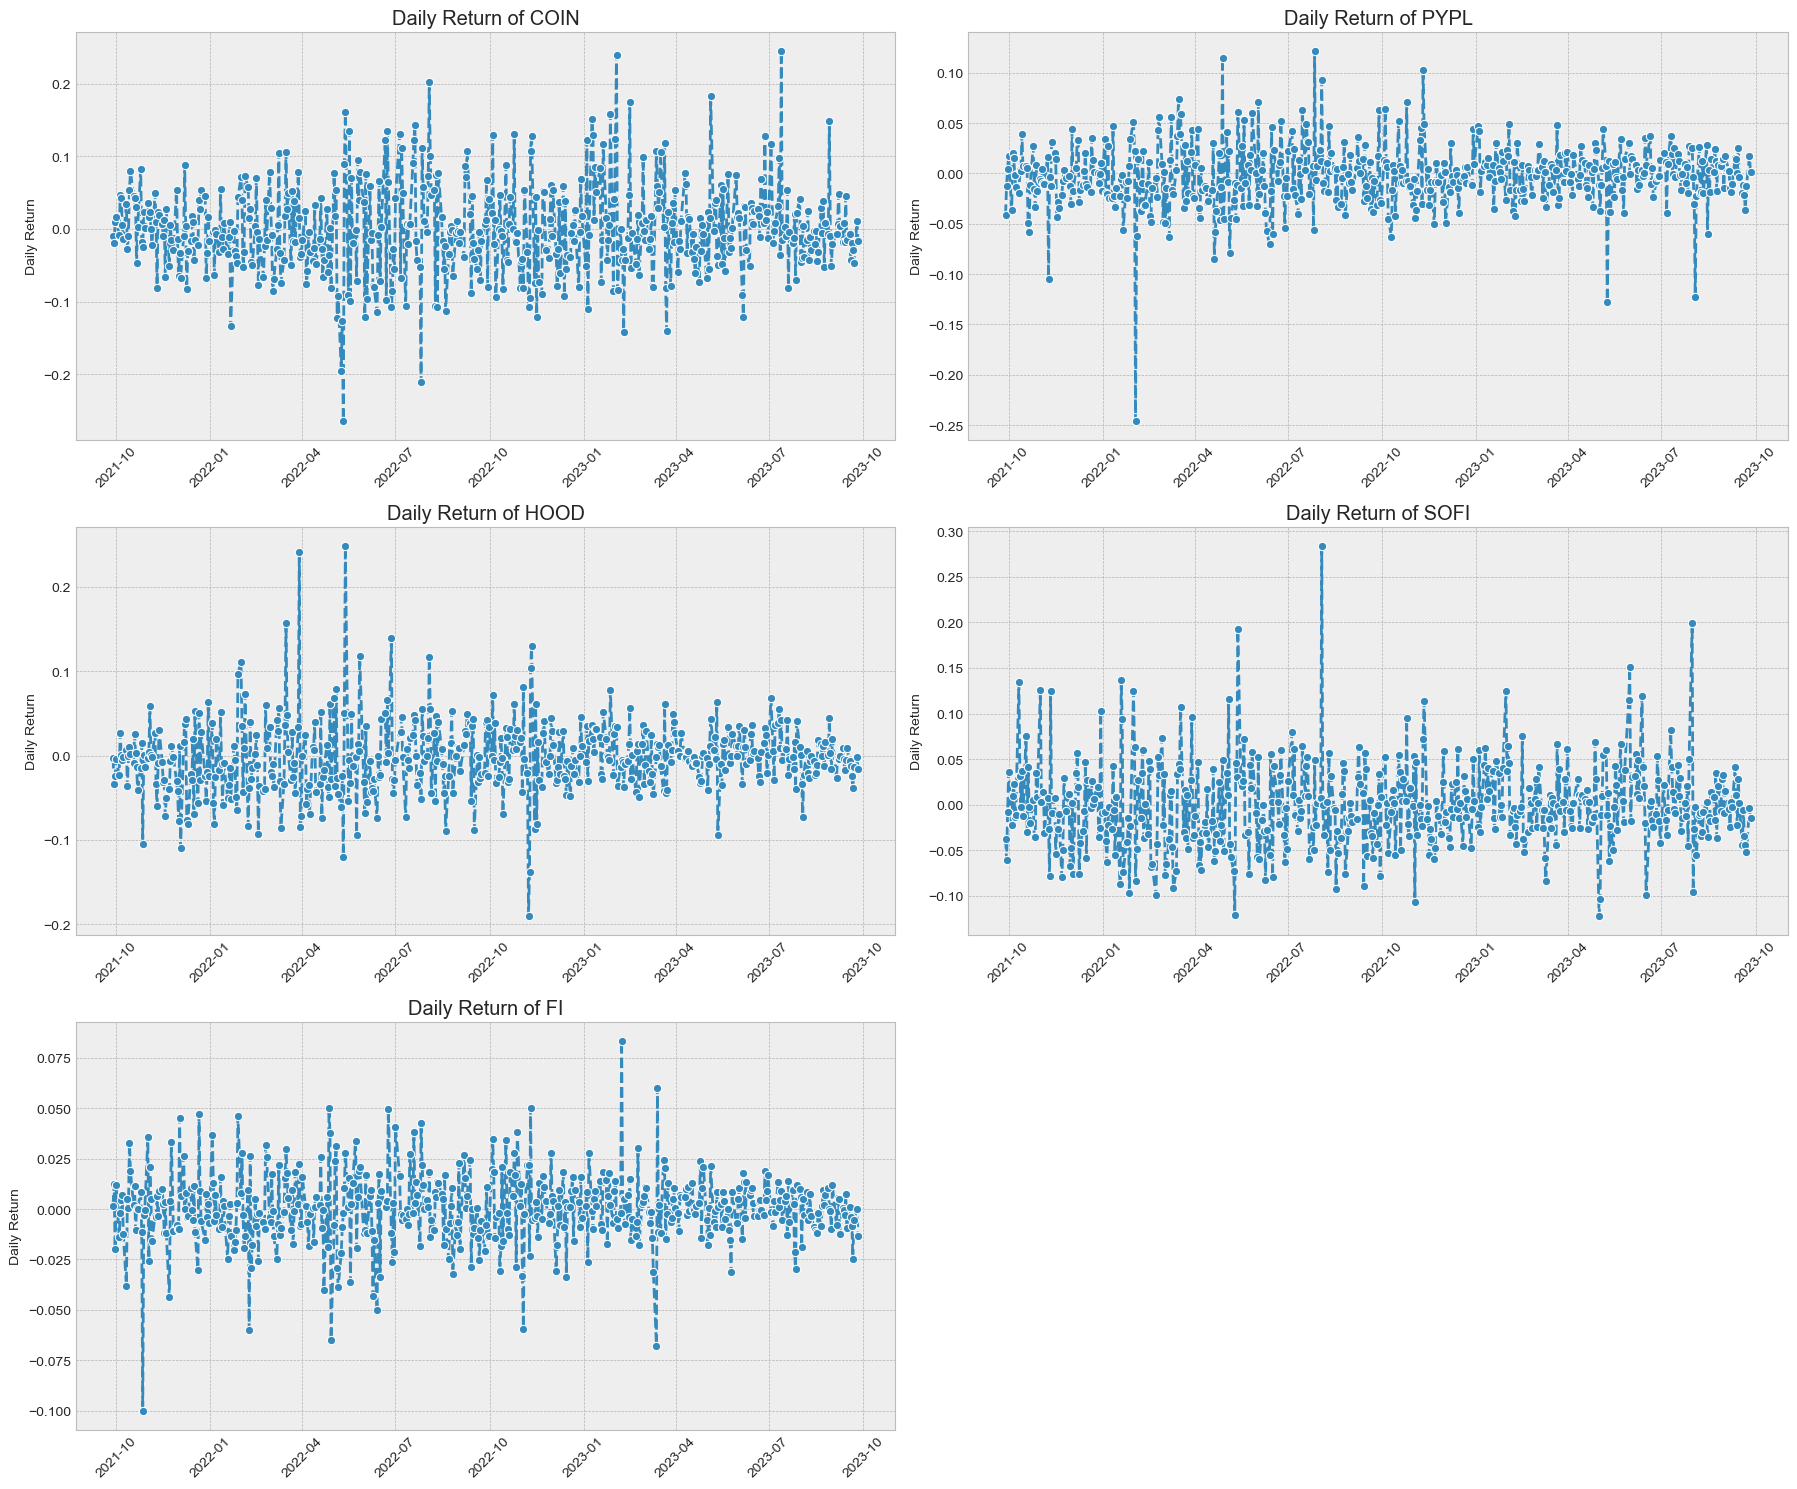

In [10]:
#lets take a look into the daily returns
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company, x=company.index, y='Daily Return',linestyle='--', marker='o')
    plt.ylabel('Daily Return')
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.title(f"Daily Return of {fintech_list[i - 1]}")
    
plt.tight_layout()

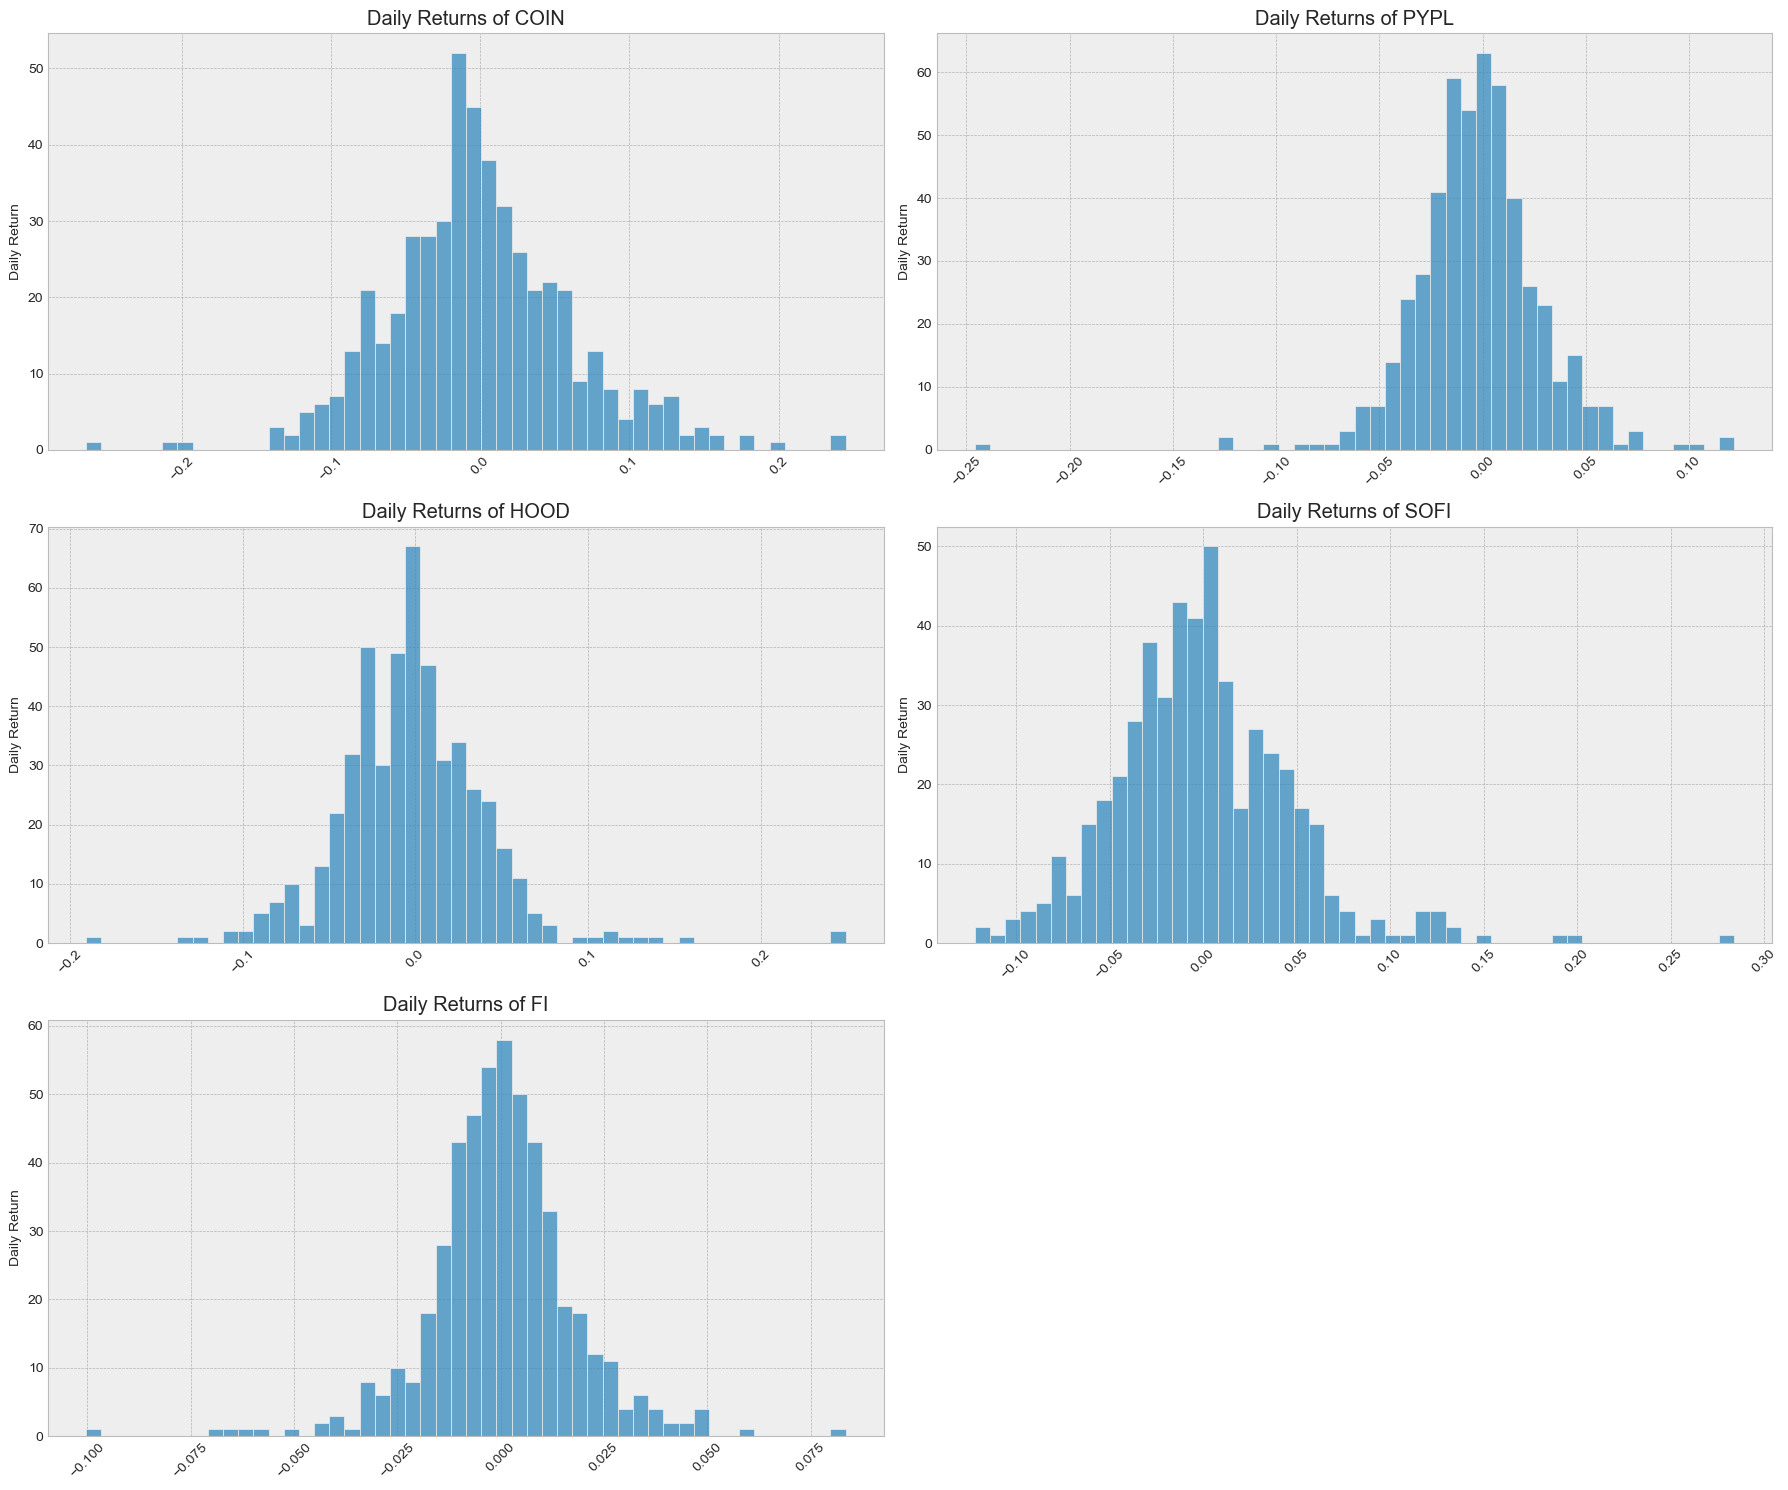

In [11]:
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=company['Daily Return'], bins=50)
    plt.ylabel('Daily Return')
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.title(f"Daily Returns of {fintech_list[i - 1]}")
    
plt.tight_layout()

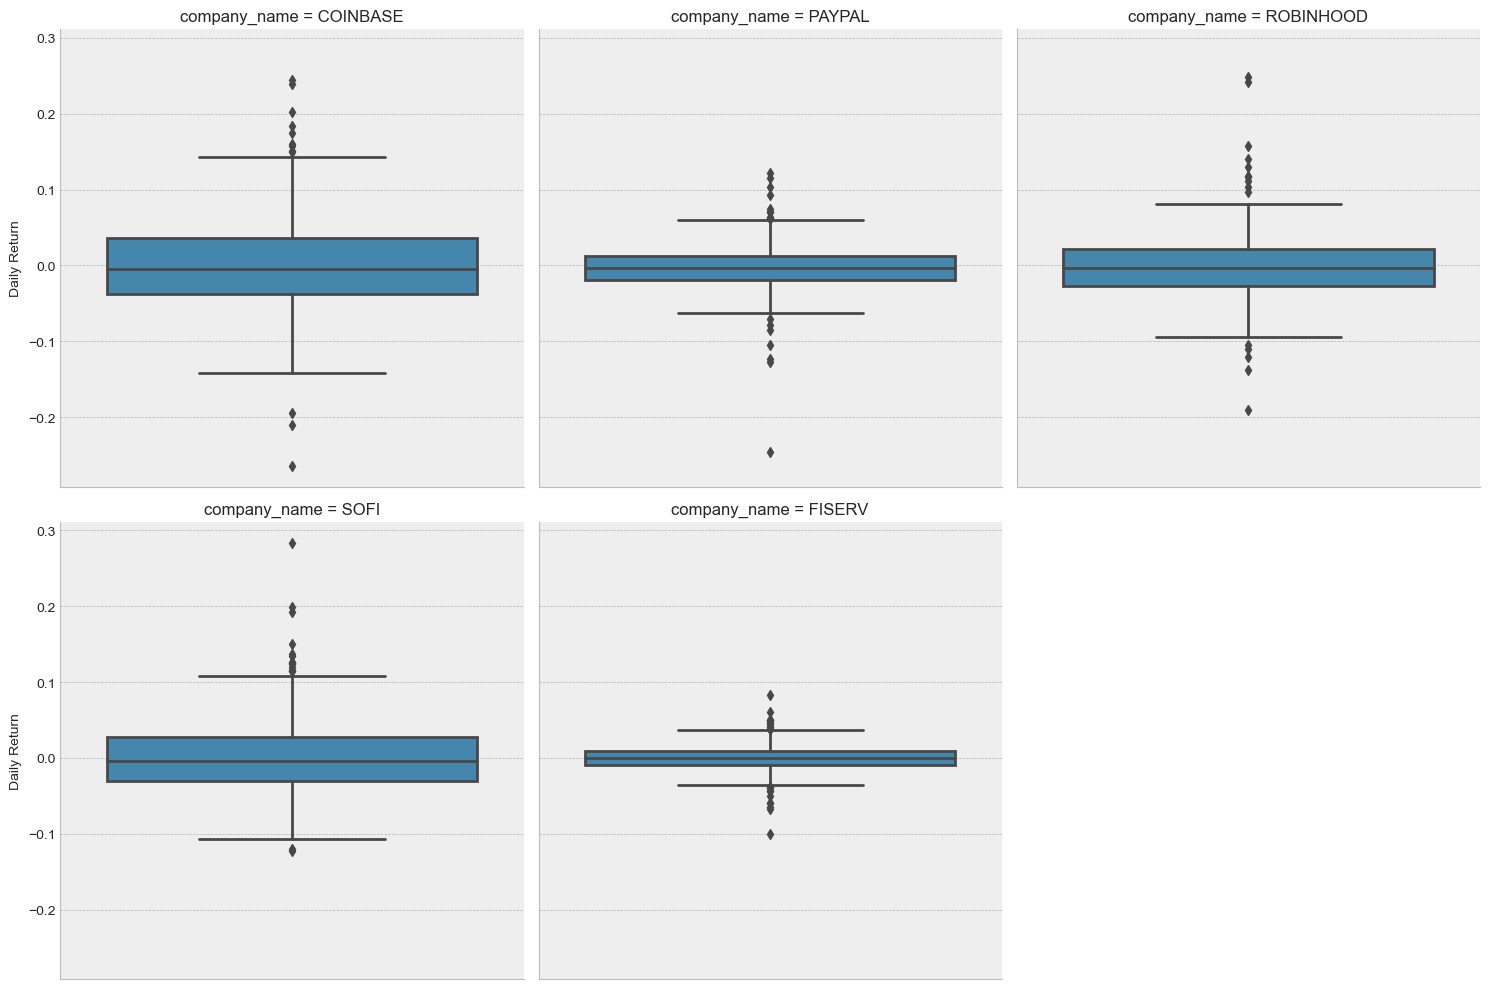

In [12]:
#Box plot of daily returns
sns.catplot(data=all_fintech_df, y='Daily Return', col='company_name', col_wrap=3, kind='box')

In [13]:
fintech_closing=all_fintech_df[['Close', 'company_name']].pivot(columns='company_name', values='Close')
fintech_closing.head()

company_name    COINBASE      FISERV      PAYPAL  ROBINHOOD       SOFI
Date                                                                  
2021-09-27    232.240005  109.139999  273.390015  44.759998  17.700001
2021-09-28    229.839996  109.330002  262.190002  44.619999  17.040001
2021-09-29    225.279999  110.669998  259.000000  43.130001  16.010000
2021-09-30    227.479996  108.500000  260.209991  42.080002  15.880000
2021-10-01    231.149994  109.779999  264.649994  41.900002  16.450001

In [14]:
fintech_returns=all_fintech_df[['Daily Return', 'company_name']].pivot(columns='company_name', values='Daily Return')
fintech_returns.head()

company_name  COINBASE    FISERV    PAYPAL  ROBINHOOD      SOFI
Date                                                           
2021-09-27         NaN       NaN       NaN        NaN       NaN
2021-09-28   -0.010334  0.001741 -0.040967  -0.003128 -0.037288
2021-09-29   -0.019840  0.012256 -0.012167  -0.033393 -0.060446
2021-09-30    0.009766 -0.019608  0.004672  -0.024345 -0.008120
2021-10-01    0.016133  0.011797  0.017063  -0.004278  0.035894

<Figure size 1800x1500 with 0 Axes>

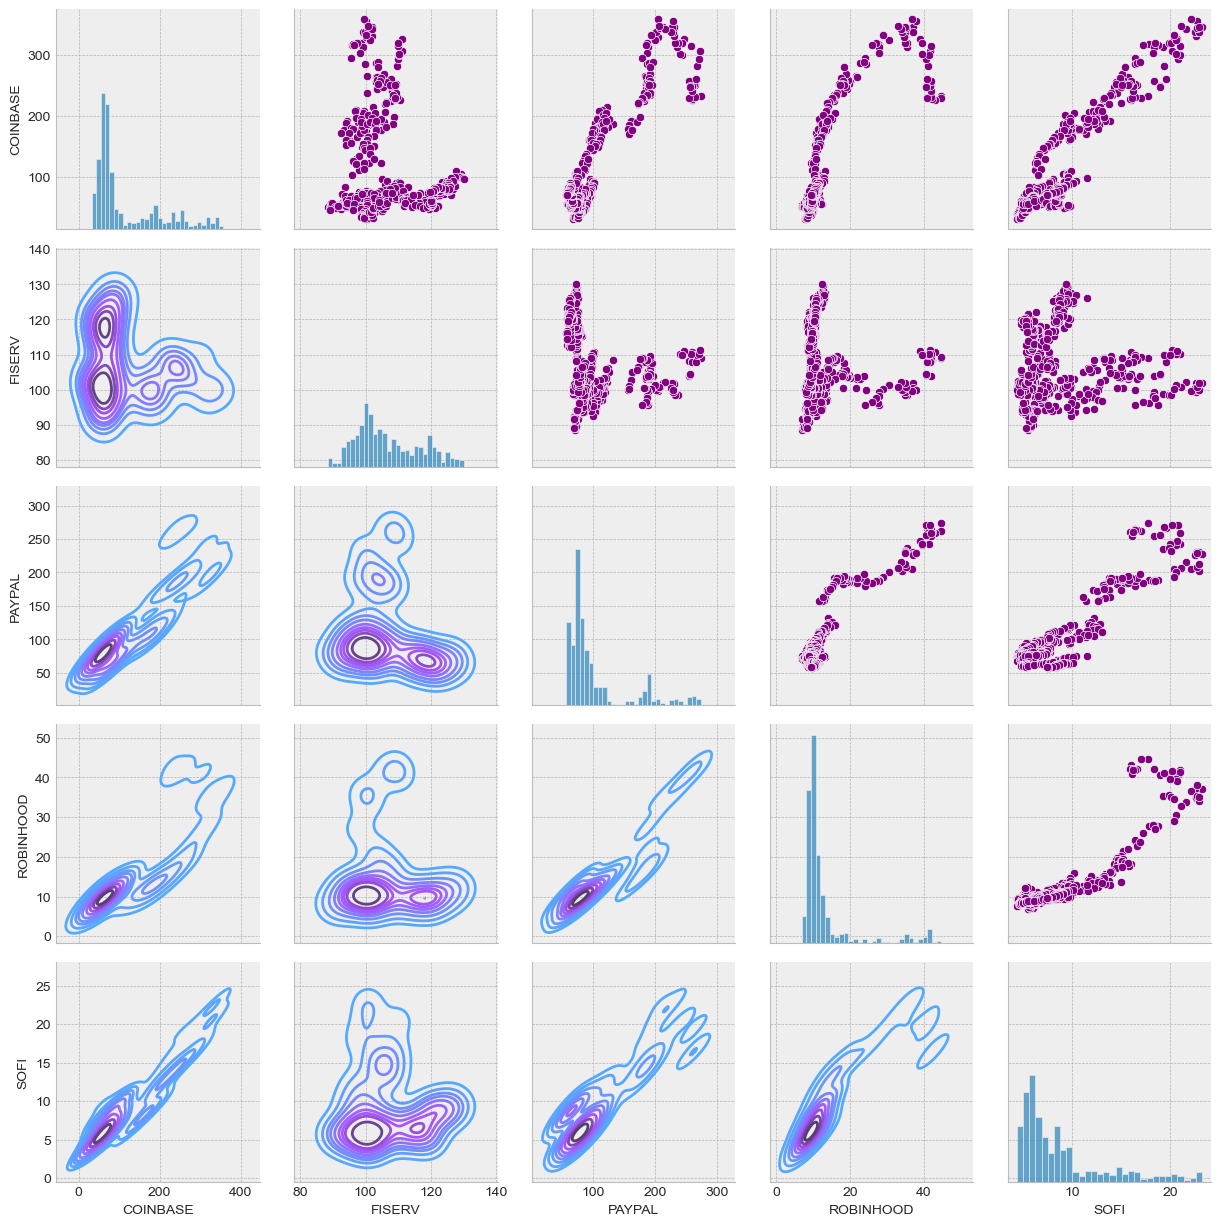

In [15]:
plt.figure(figsize=(18, 15))
g=sns.PairGrid(fintech_closing)
g.map_upper(sns.scatterplot, color='purple')
g.map_diag(sns.histplot, bins=30)
g.map_lower(sns.kdeplot, cmap='cool_d')

<Figure size 1800x1500 with 0 Axes>

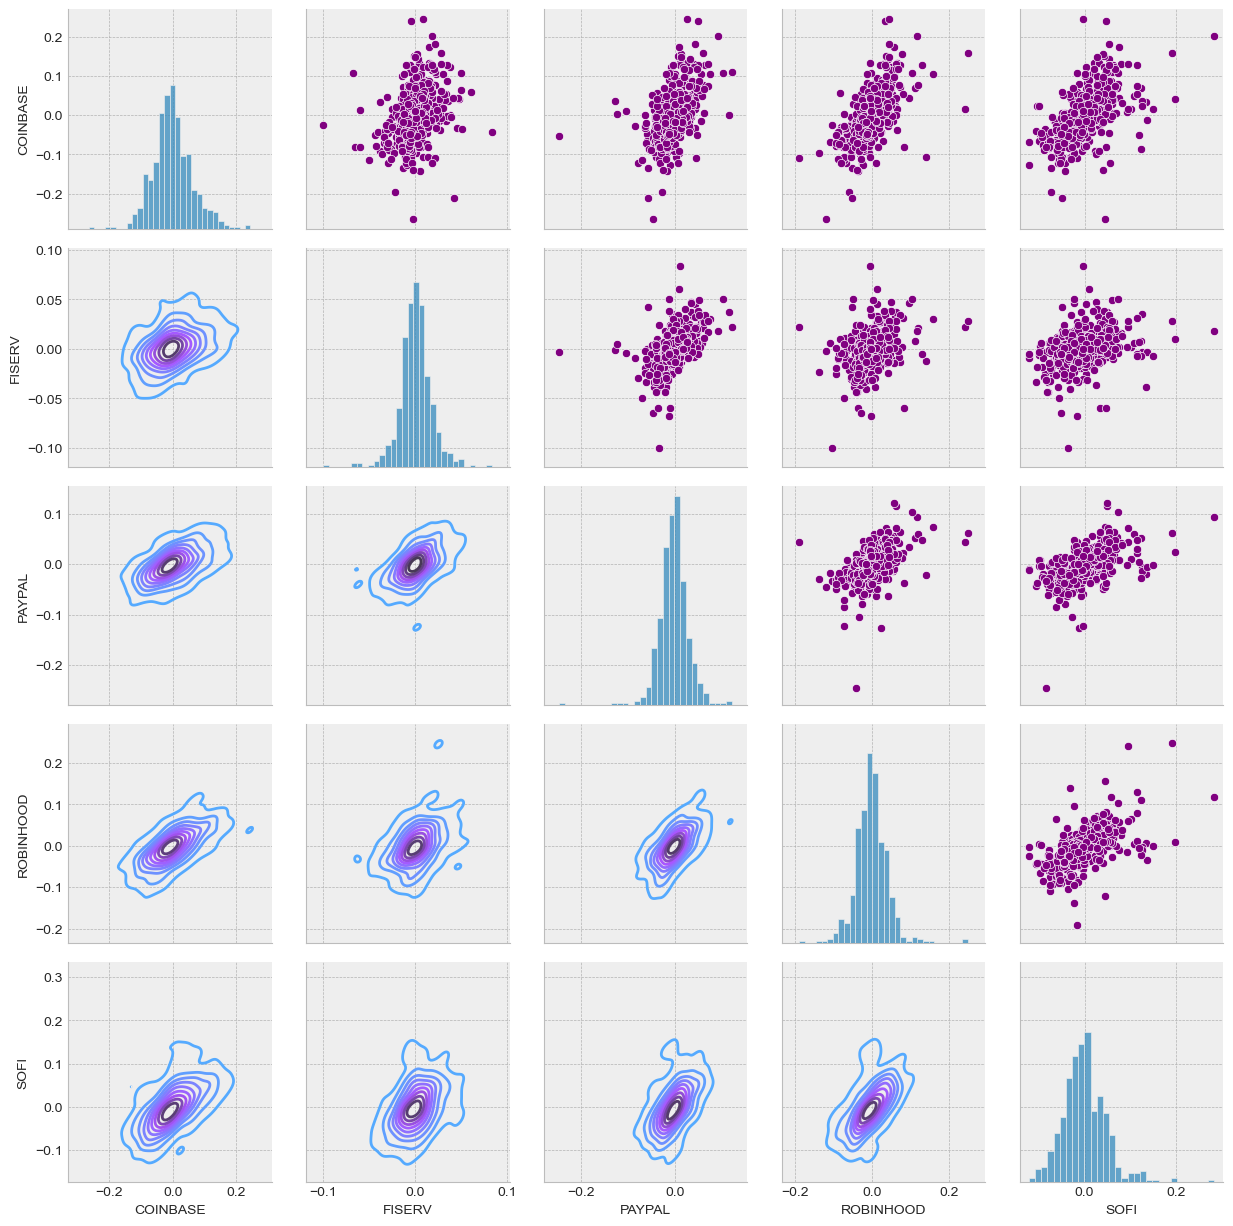

In [16]:
plt.figure(figsize=(18, 15))
g=sns.PairGrid(fintech_returns)
g.map_upper(sns.scatterplot, color='purple')
g.map_diag(sns.histplot, bins=30)
g.map_lower(sns.kdeplot, cmap='cool_d')

Text(0.5, 1.0, 'Correlation of stock return')

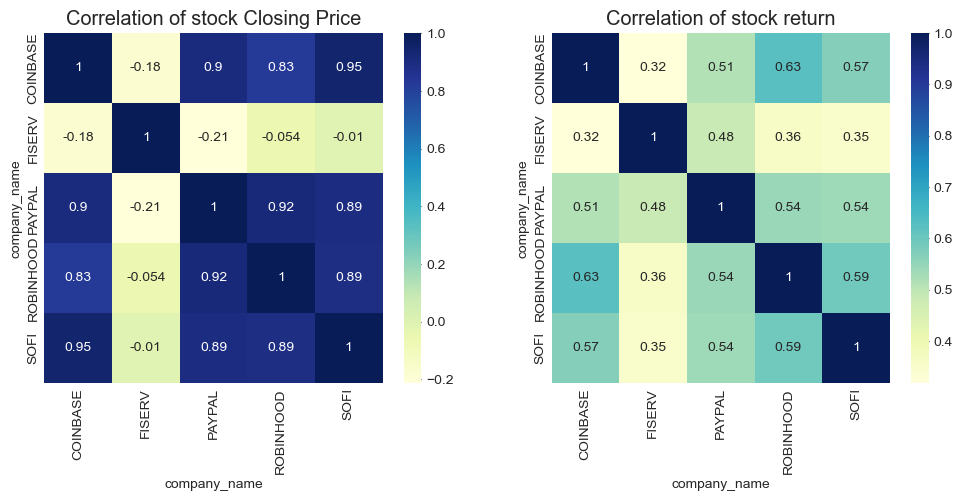

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(fintech_closing.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of stock Closing Price')

plt.subplot(2, 2, 2)
sns.heatmap(fintech_returns.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of stock return')

mac5=COIN['Adj Close'].rolling(5).mean()
COIN['ma5']=mac5
COIN.head(10)

sns.lineplot(data=COIN[['Adj Close', 'ma5']])

In [18]:
#Moving averages
ma_days=[5, 20, 50]

for ma in ma_days:
    for company in company_list:
        company[f'Ma for {ma} days']=company['Adj Close'].rolling(ma).mean()

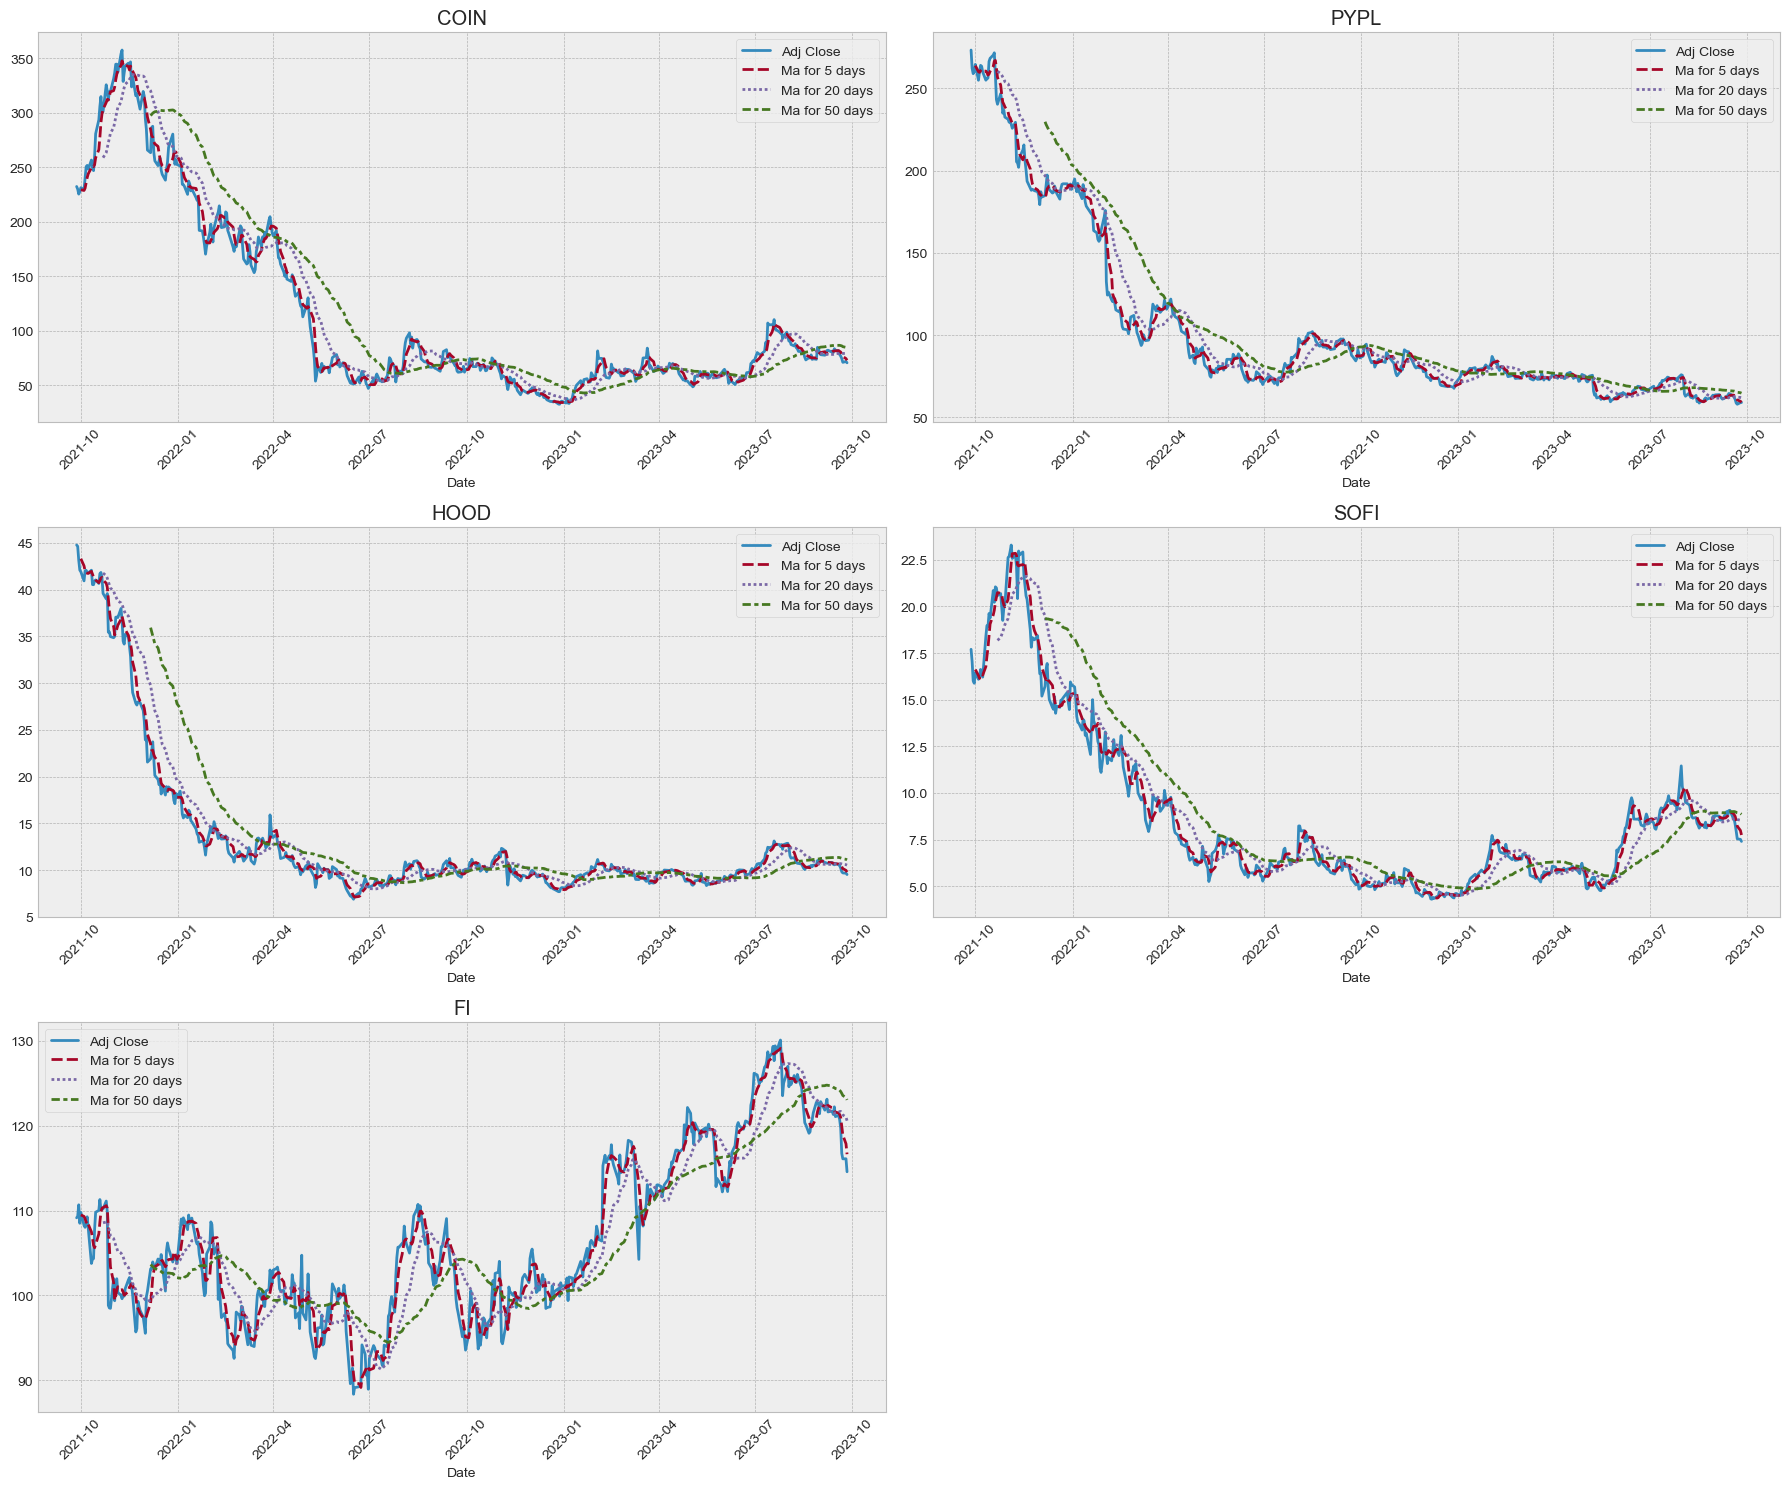

In [19]:
plt.figure(figsize=(18, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company[["Adj Close", "Ma for 5 days", "Ma for 20 days", "Ma for 50 days"]])
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.title(f"{fintech_list[i - 1]}")
    
plt.tight_layout()

In [20]:
train_len=int(len(COIN)*0.95)
display(train_len)

477

In [21]:
training_set=['COIN_train', 'PYPL_train', 'HOOD_train', 'SOFI_train', 'FI_train']
for company, train in zip(company_list, training_set):
    globals()[train]=company.iloc[0:train_len]
    globals()[train]=(globals()[train])[['Close']]
company_train=[COIN_train, PYPL_train, HOOD_train, SOFI_train, FI_train]

In [22]:
test_set=['COIN_test', 'PYPL_test', 'HOOD_test', 'SOFI_test', 'FI_test']
for company, test in zip(company_list, test_set):
    globals()[test]=company.iloc[train_len:int(len(company))]
    globals()[test]=(globals()[test])[['Close']]
company_test=[COIN_test, PYPL_test, HOOD_test, SOFI_test, FI_test]
display(len(COIN_train), len(COIN_test))

477

26

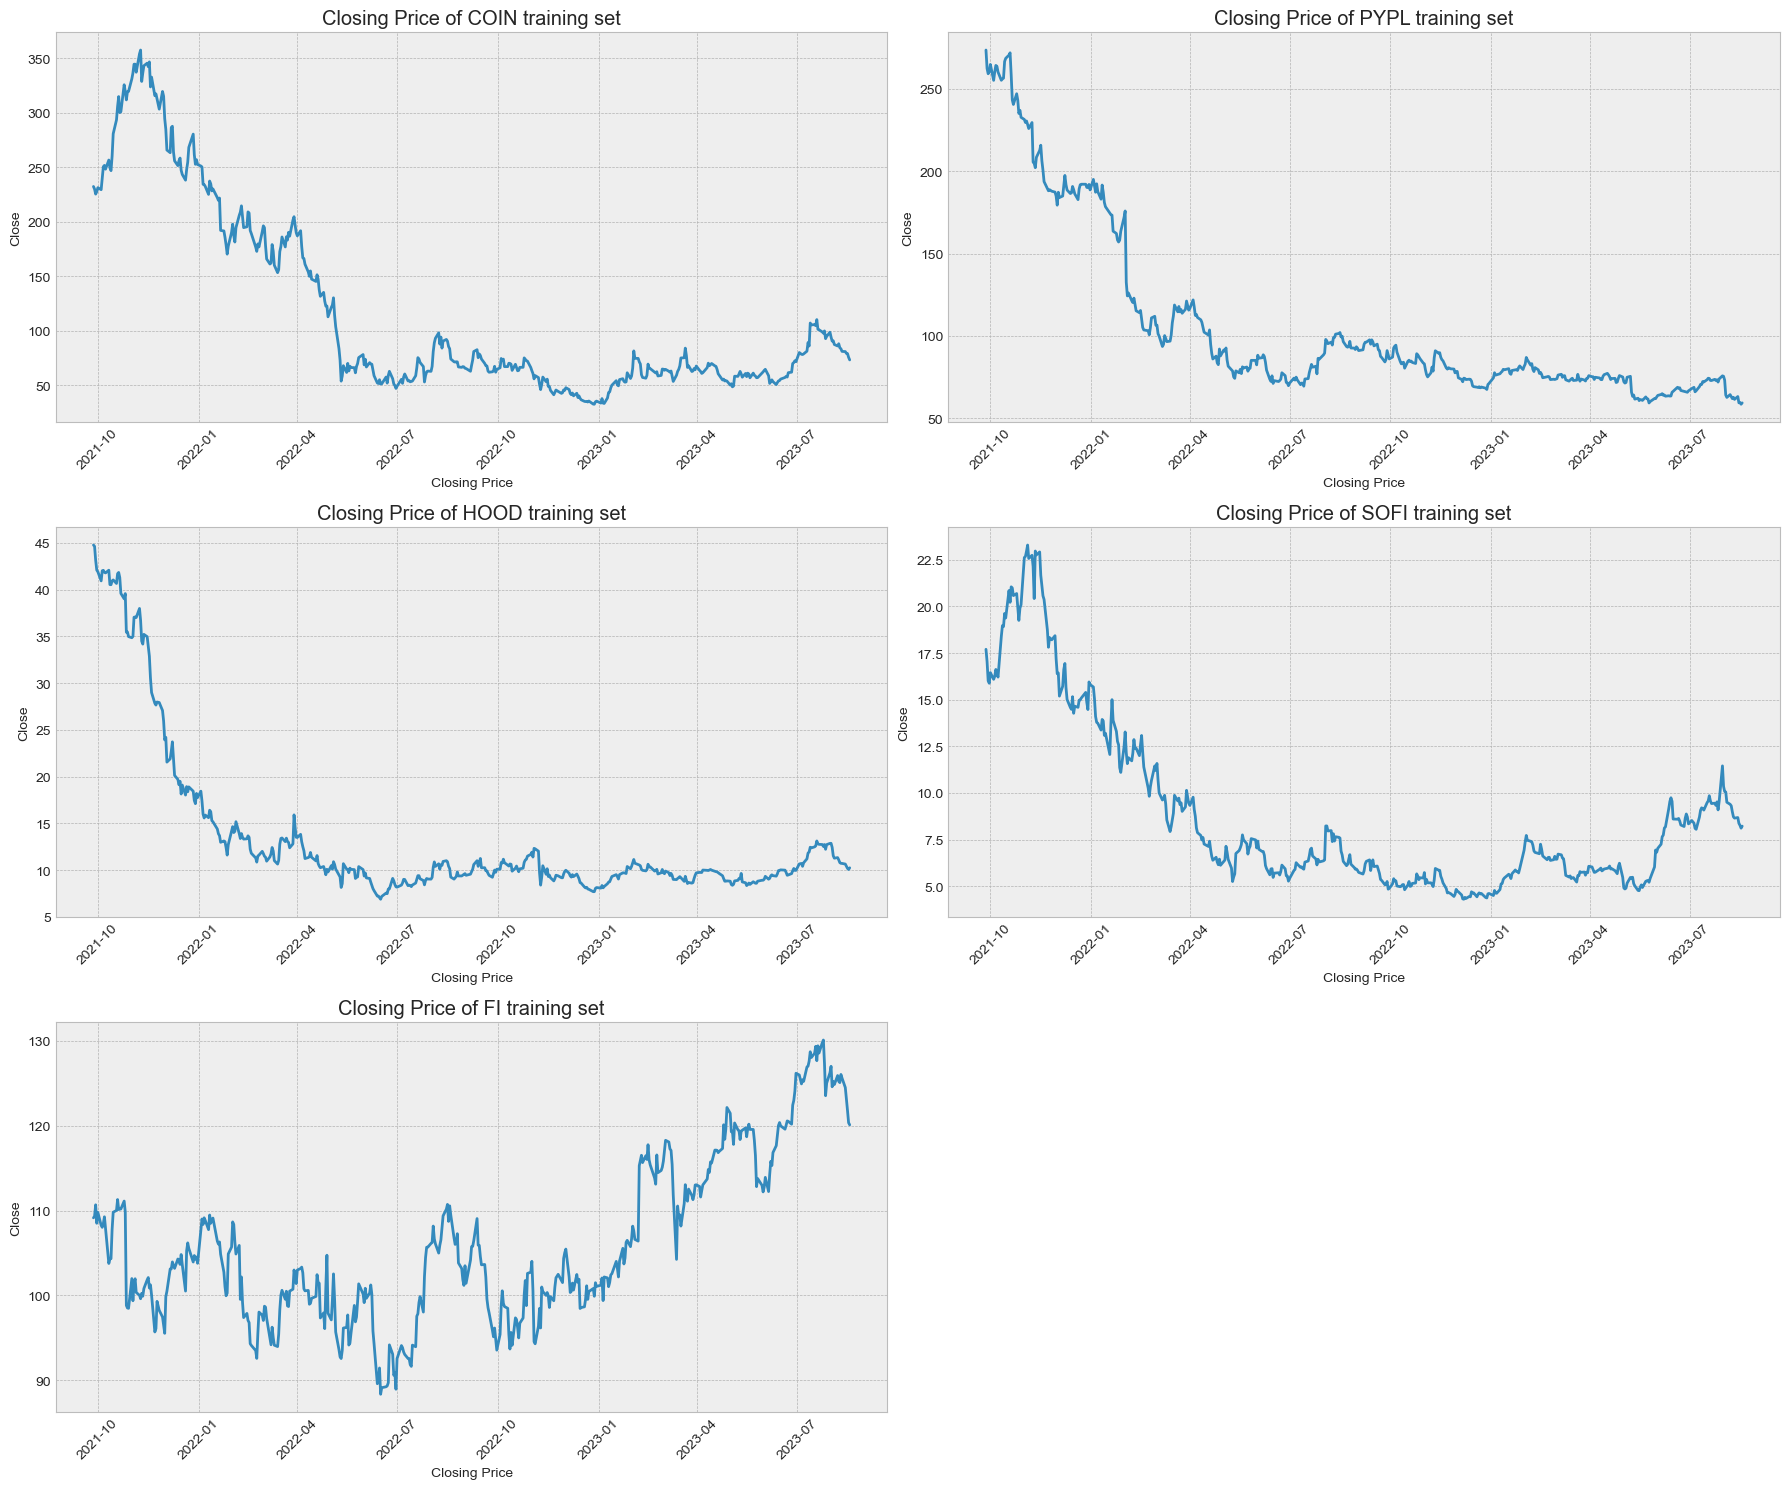

In [23]:
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)


for i, company in enumerate(company_train, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company, y='Close', x=company.index)
    plt.xlabel('Closing Price')
    plt.xticks(rotation=45)
    plt.title(f"Closing Price of {fintech_list[i-1]} training set")
plt.tight_layout()

In [24]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller

In [25]:
def adfuller_test(stock):
    ad_results={}
    results=adfuller(stock)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(results, labels):
        ad_results[label]=value
        
    name=stock.index
    if results[1]<=0.05:
        
        print(" strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print(" weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    return pd.DataFrame(ad_results, index=range(0,1))

In [26]:
for company, i in zip(company_train, fintech_list):


    company['stationary_test'] = company['Close']
    d = 0  # Initialize differencing order

    while True:
        adtest = adfuller_test((company['stationary_test']).dropna())
    
        if float(adtest['p-value']) <= 0.05 or d >= 2:
            break  # Exit the loop if the data is stationary or differenced twice
    
        company['stationary_test'] = company['stationary_test'] - company['stationary_test'].shift(1)
        company['stationary_test'] = company['stationary_test'].dropna()
        d += 1

    print(f"{i} Differencing order (d): {d}")
    display(adtest)

 weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
COIN Differencing order (d): 1


ADF Test Statistic   p-value  #Lags Used  Number of Observations Used
0           -5.292585  0.000006          14                          461

 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
PYPL Differencing order (d): 0


ADF Test Statistic   p-value  #Lags Used  Number of Observations Used
0           -3.387996  0.011375           2                          474

 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
HOOD Differencing order (d): 0


ADF Test Statistic   p-value  #Lags Used  Number of Observations Used
0           -5.252756  0.000007          12                          464

 weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
SOFI Differencing order (d): 1


ADF Test Statistic       p-value  #Lags Used  Number of Observations Used
0           -6.839541  1.805994e-09           7                          468

 weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
FI Differencing order (d): 1


ADF Test Statistic  p-value  #Lags Used  Number of Observations Used
0          -22.426824      0.0           0                          475

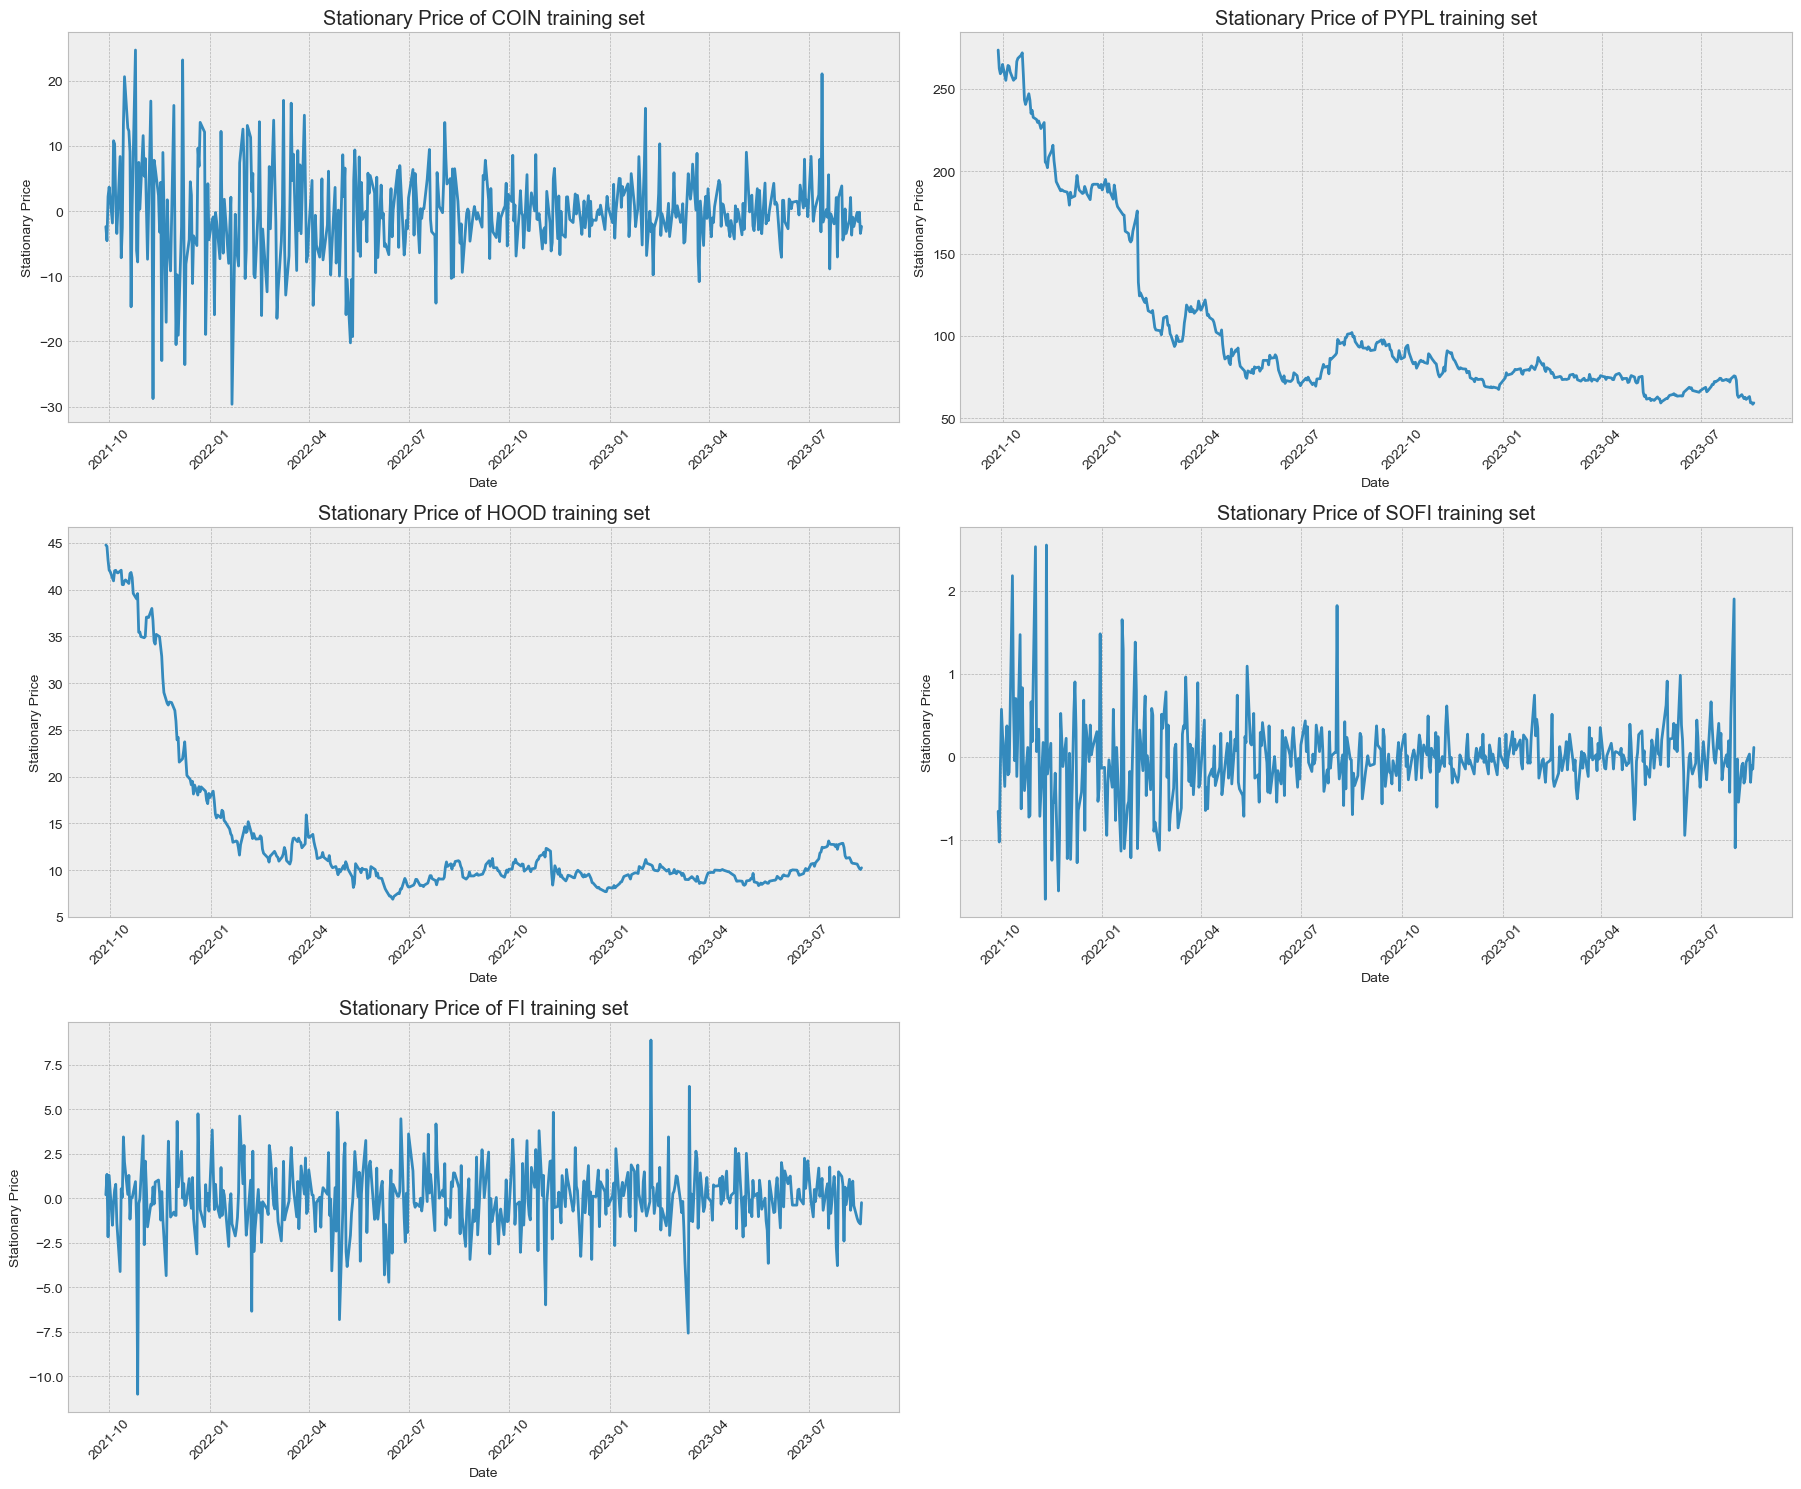

In [27]:
#Plotting the stationary prices of each stock
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)


for i, company in enumerate(company_train, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=company, y='stationary_test', x=company.index)
    plt.xlabel('Date')
    plt.ylabel('Stationary Price')
    plt.xticks(rotation=45)
    plt.title(f"Stationary Price of {fintech_list[i-1]} training set")
plt.tight_layout()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

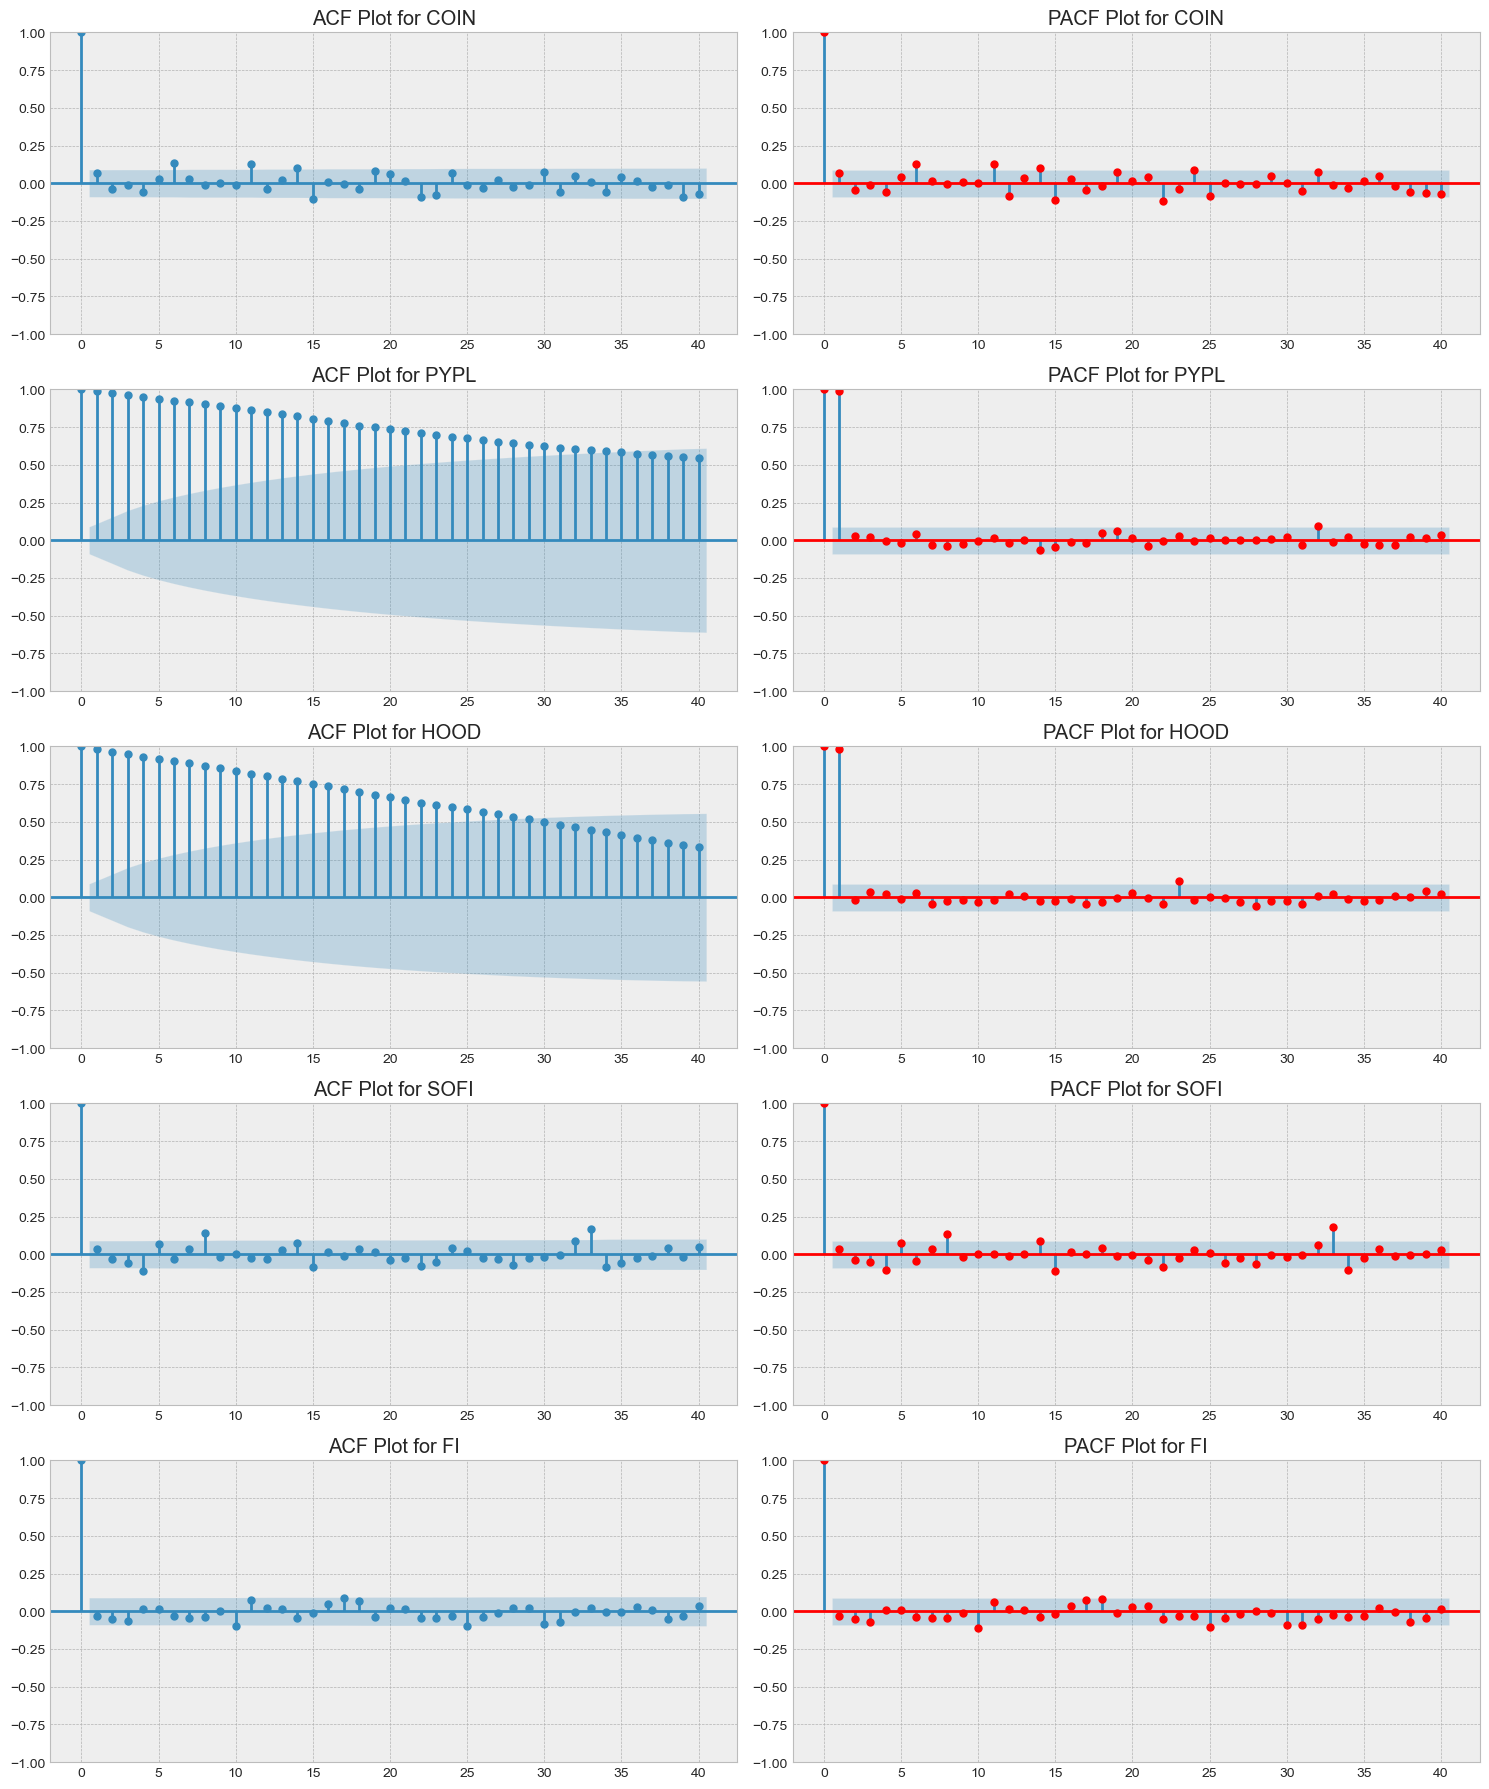

In [29]:
# Create subplots with multiple rows and columns
fig, axes = plt.subplots(len(company_train), 2, figsize=(15, 18))

for i, company in enumerate(company_train):
    # ACF Plot
    ax1 = axes[i, 0]
    sm.graphics.tsa.plot_acf(company['stationary_test'].dropna(), lags=40, ax=ax1)
    ax1.set_title(f'ACF Plot for {fintech_list[i]}')

    # PACF Plot
    ax2 = axes[i, 1]
    sm.graphics.tsa.plot_pacf(company['stationary_test'].dropna(), lags=40, ax=ax2, color='r', method='ywm')
    ax2.set_title(f'PACF Plot for {fintech_list[i]}')

plt.tight_layout()
plt.show()

In [30]:
orders=[(6,1,6), (2,0,1), (2,0,1), (4,1,6), (1,1,1)]
models=['COIN_model', 'PYPL_model', 'HOOD_model', 'SOFI_model', 'FI_model']

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [32]:
for company, order,i in zip(company_train, orders, range(1,6)):
    model = ARIMA(company['Close'], order=order)
    globals()[models[i-1]] = (model)
arima_models=[COIN_model, PYPL_model, HOOD_model, SOFI_model, FI_model]


In [33]:
model_fit=['COIN_model_fit', 'PYPL_model_fit', 'HOOD_model_fit', 'SOFI_model_fit', 'FI_model_fit']

for m, i in zip(arima_models, range(1,6)):
    globals()[model_fit[i-1]]=m.fit()
    display(model_fit[i-1],m.fit().summary() )
arima_models_fit=[COIN_model_fit, PYPL_model_fit, HOOD_model_fit, SOFI_model_fit, FI_model_fit]

'COIN_model_fit'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  477
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -1570.432
Date:                Wed, 27 Sep 2023   AIC                           3166.864
Time:                        03:43:55   BIC                           3221.014
Sample:                             0   HQIC                          3188.156
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5030      0.295      1.704      0.088      -0.075       1.081
ar.L2         -0.2042      0.066     -3.080      0.002      -0.334      -0.074
ar.L3          0.3934      0.106      3.728      0.000       0.187       0.600
ar.L4         -0.0834      0.090     -0.921      0.357      -0.261       0.094
ar.L5          0.6956      0.067     10.354      0.000       0.564       0.827
ar.L6         -0.5308      0.246     -2.158      0.031      -1.013      -0.049
ma.L1         -0.4135      0.281     -1.470      0.142      -0.965       0.138
ma.L2          0.1359      0.092      1.470      0.141      -0.045       0.317
ma.L3         -0.3770      0.100     -3.778      0.000      -0.573      -0.181
ma.L4          0.0509      0.083      0.615      0.539      -0.111       0.213
ma.L5         -0.7482      0.073    -10.277      0.000      -0.891      -0.606
ma.L6          0.6665      0.253      2.638      0.008       0.171       1.162
sigma2        42.6054      2.278     18.705      0.000      38.141      47.070
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                69.02
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'PYPL_model_fit'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  477
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1329.306
Date:                Wed, 27 Sep 2023   AIC                           2668.613
Time:                        03:43:55   BIC                           2689.450
Sample:                             0   HQIC                          2676.805
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.2011     94.031      1.661      0.097     -28.097     340.499
ar.L1          0.6542      0.451      1.449      0.147      -0.231       1.539
ar.L2          0.3446      0.451      0.764      0.445      -0.539       1.229
ma.L1          0.4323      0.441      0.981      0.327      -0.432       1.296
sigma2        15.2131      0.264     57.653      0.000      14.696      15.730
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):             23462.54
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -3.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'HOOD_model_fit'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  477
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -446.069
Date:                Wed, 27 Sep 2023   AIC                            902.139
Time:                        03:43:55   BIC                            922.977
Sample:                             0   HQIC                           910.332
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4543     14.745      1.726      0.084      -3.446      54.354
ar.L1          0.0175      0.016      1.076      0.282      -0.014       0.049
ar.L2          0.9811      0.016     62.233      0.000       0.950       1.012
ma.L1          0.9994      0.087     11.515      0.000       0.829       1.170
sigma2         0.3736      0.032     11.777      0.000       0.311       0.436
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):              1019.96
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'SOFI_model_fit'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  477
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -312.172
Date:                Wed, 27 Sep 2023   AIC                            646.344
Time:                        03:43:57   BIC                            692.164
Sample:                             0   HQIC                           664.361
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3598      0.118      3.051      0.002       0.129       0.591
ar.L2         -0.2648      0.114     -2.320      0.020      -0.488      -0.041
ar.L3         -0.0791      0.107     -0.742      0.458      -0.288       0.130
ar.L4         -0.6618      0.109     -6.054      0.000      -0.876      -0.448
ma.L1         -0.3117      0.128     -2.443      0.015      -0.562      -0.062
ma.L2          0.2188      0.107      2.049      0.040       0.010       0.428
ma.L3          0.0486      0.108      0.451      0.652      -0.162       0.260
ma.L4          0.5948      0.111      5.338      0.000       0.376       0.813
ma.L5          0.1310      0.042      3.096      0.002       0.048       0.214
ma.L6         -0.1635      0.048     -3.376      0.001      -0.258      -0.069
sigma2         0.2165      0.008     26.958      0.000       0.201       0.232
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               675.39
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

'FI_model_fit'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  477
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -971.157
Date:                Wed, 27 Sep 2023   AIC                           1948.315
Time:                        03:43:57   BIC                           1960.811
Sample:                             0   HQIC                          1953.228
                                - 477                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9209      0.047     19.539      0.000       0.828       1.013
ma.L1         -0.9629      0.033    -29.242      0.000      -1.027      -0.898
sigma2         3.4636      0.129     26.920      0.000       3.211       3.716
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               383.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
company_forecast=['COIN_forecast','PYPL_forecast','HOOD_forecast','SOFI_forecast','FI_forecast']
for fit, stock,i in zip(arima_models_fit, company_list, range(1,6)):
    forecast=fit.predict(start=(int(len(stock)*0.90)),end=int(len(stock)+20),dynamic=False, freq='B')
    date_range = pd.date_range(start=stock.index[int(len(stock)*0.90)], periods=len(forecast), freq='B')
    forecast_df=pd.DataFrame({'forecast': forecast, 'Date': date_range}).set_index('Date')
    globals()[company_forecast[i-1]]=stock.merge(forecast_df, on='Date', how='outer')
company_forecasts=[COIN_forecast, PYPL_forecast, HOOD_forecast, SOFI_forecast, FI_forecast]

In [35]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

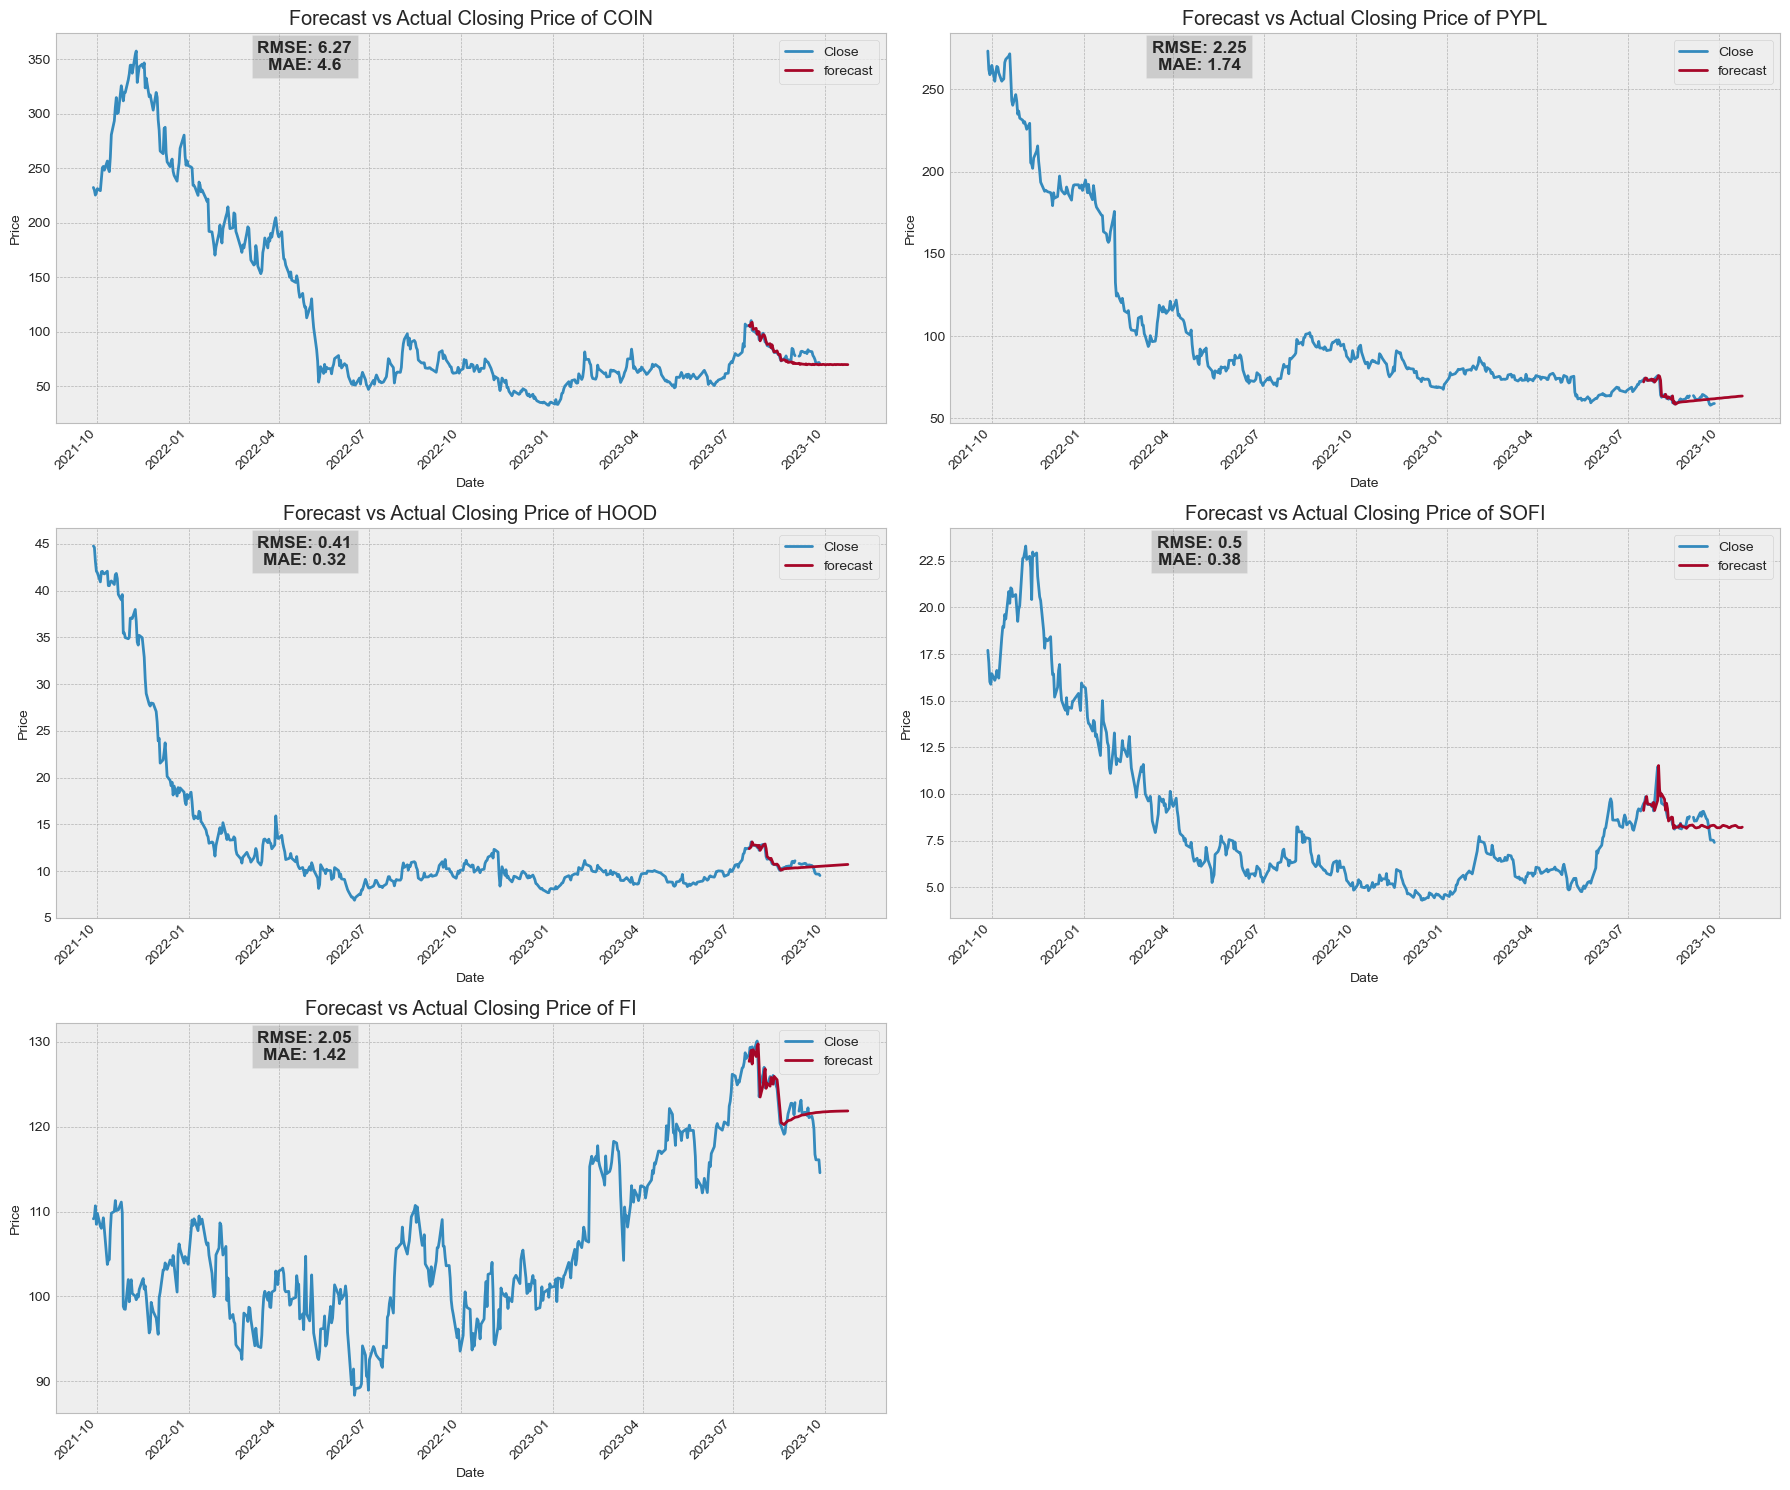

In [36]:
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)


for i, forecast in enumerate(company_forecasts, 1):
    ax=plt.subplot(3, 2, i)
    forecast[['Close', 'forecast']].plot(ax=ax)
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title(f"Forecast vs Actual Closing Price of {fintech_list[i-1]}")
    mae=MAE(forecast[['Close', 'forecast']].dropna().Close, forecast[['Close', 'forecast']].dropna().forecast)
    rmse=sqrt(MSE(forecast[['Close', 'forecast']].dropna().Close, forecast[['Close', 'forecast']].dropna().forecast))
    plt.text(0.3,0.94, f'RMSE: {round(rmse, 2)}\nMAE: {round(mae, 2)}', transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='grey', alpha=0.3), font=dict(family='Arial', size=12.5), weight='bold')
plt.tight_layout()



In [37]:
for i, forecast in enumerate(company_forecasts, 1):
    print(f'The forecasted average returns of {company_name[i-1]} stock is '+ str(round(forecast['forecast'].iloc[len(COIN_train):-1].pct_change().mean(), 5)))

The forecasted average returns of COINBASE stock is -0.00136
The forecasted average returns of PAYPAL stock is 0.00136
The forecasted average returns of ROBINHOOD stock is 0.001
The forecasted average returns of SOFI stock is -7e-05
The forecasted average returns of FISERV stock is 0.0003
